# Phân Tích Khám Phá Dữ Liệu (EDA) - Dự Đoán Doanh Thu Phim

---

## Thông Tin Dự Án

**Tên dự án:** Movie Revenue Prediction  
**Môn học:** Python cho Khoa học Dữ liệu - K23  
**Loại bài toán:** Regression (Hồi quy)  
**Nguồn dữ liệu:** TMDb API (The Movie Database)  
**Thời gian:** Phim phát hành từ 2010-2024

---

## Mục Tiêu của Notebook

Notebook này thực hiện phân tích khám phá dữ liệu (Exploratory Data Analysis - EDA) trên tập dữ liệu phim thô, nhằm:

1. **Đánh giá chất lượng dữ liệu:** Xác định missing values, outliers, và các vấn đề về data quality
2. **Khám phá phân phối các biến:** Hiểu rõ đặc điểm của từng feature riêng lẻ
3. **Phân tích mối quan hệ:** Tìm ra correlations giữa các features và target variable (revenue)
4. **Rút ra insights:** Xác định patterns và insights quan trọng để hướng dẫn preprocessing và modeling
5. **Trực quan hóa:** Tạo các biểu đồ chất lượng cao phục vụ báo cáo

---

## Cấu Trúc Notebook

1. **Introduction & Setup** - Thiết lập môi trường và load dữ liệu
2. **Data Quality Assessment** - Đánh giá chất lượng dữ liệu
3. **Univariate Analysis** - Phân tích từng biến riêng lẻ
4. **Bivariate Analysis** - Phân tích mối quan hệ giữa các biến
5. **Text Analysis** - Phân tích dữ liệu text (overview)
6. **Multivariate & Special Analysis** - ROI và Production Companies
7. **Key Insights & Recommendations** - Tổng kết và khuyến nghị

---

# 1. INTRODUCTION & SETUP

Phần này thiết lập môi trường làm việc, import các thư viện cần thiết, và load dữ liệu thô từ file CSV.

## 1.1. Import Libraries

In [48]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text processing
from collections import Counter
import re

# Statistics
from scipy import stats
from scipy.stats import skew, kurtosis

# Utilities
import warnings
from pathlib import Path

# Cấu hình
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

# Matplotlib style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

## 1.2. Helper Functions

In [49]:
def save_and_show_plot(filename, dpi=300):
    """
    Hàm tiện ích để tự động lưu và hiển thị plot.
    
    Args:
        filename (str): Tên file (không cần extension)
        dpi (int): Độ phân giải ảnh
    """
    # Tạo thư mục nếu chưa tồn tại
    save_dir = Path('visualizations/eda_plots')
    save_dir.mkdir(parents=True, exist_ok=True)
    
    # Lưu plot
    filepath = save_dir / f"{filename}.png"
    plt.savefig(filepath, dpi=dpi, bbox_inches='tight', facecolor='white')
    print(f"Đã lưu plot: {filepath}")
    
    # Hiển thị
    plt.show()
    
    # Đóng figure để tránh memory leak
    plt.close()

def format_currency(value):
    """
    Format số thành dạng currency (USD).
    
    Args:
        value (float): Giá trị cần format
    
    Returns:
        str: Chuỗi đã format
    """
    if value >= 1e9:
        return f"${value/1e9:.2f}B"
    elif value >= 1e6:
        return f"${value/1e6:.2f}M"
    elif value >= 1e3:
        return f"${value/1e3:.2f}K"
    else:
        return f"${value:.2f}"

def print_section_header(title):
    """
    In header đẹp cho mỗi section.
    
    Args:
        title (str): Tiêu đề section
    """
    print("\n" + "-"*80)
    print(f"  {title}")
    print("-"*80 + "\n")

print("Đã định nghĩa helper functions")

Đã định nghĩa helper functions


## 1.3. Load Data

In [50]:
# Đọc dữ liệu từ file CSV
data_path = '../data/raw/movies_2010_2024.csv'

try:
    df = pd.read_csv(data_path)
    print(f"Đã load thành công dữ liệu từ: {data_path}")
    print(f"\nKích thước dataset: {df.shape[0]:,} hàng × {df.shape[1]} cột")
except FileNotFoundError:
    print(f"Không tìm thấy file: {data_path}")
    print("Vui lòng đảm bảo đã chạy data fetching script trước.")

Đã load thành công dữ liệu từ: ../data/raw/movies_2010_2024.csv

Kích thước dataset: 2,709 hàng × 14 cột


## 1.4. Quick Overview

In [51]:
# Hiển thị 5 dòng đầu tiên
print_section_header("QUICK DATA PREVIEW")
display(df.head())


--------------------------------------------------------------------------------
  QUICK DATA PREVIEW
--------------------------------------------------------------------------------



,id,title,budget,revenue,runtime,release_date,vote_average,vote_count,popularity,overview,genres,production_companies,original_language,status
0,12155,Alice in Wonderland,200000000,1025467110,108,2010-03-03,6.64,14478,11.04,"Alice, now 19 years old, returns to the whimsi...",Family|Fantasy|Adventure,Walt Disney Pictures|Roth Films|Team Todd|Tim ...,en,Released
1,10193,Toy Story 3,200000000,1067316101,102,2010-06-16,7.80,15309,11.47,"Woody, Buzz, and the rest of Andy's toys haven...",Animation|Family|Comedy,Pixar,en,Released
2,10192,Shrek Forever After,165000000,752600867,93,2010-05-20,6.39,7731,9.26,A bored and domesticated Shrek pacts with deal...,Comedy|Adventure|Fantasy|Animation|Family,DreamWorks Animation,en,Released
3,27205,Inception,160000000,839030630,148,2010-07-15,8.37,38303,23.77,"Cobb, a skilled thief who commits corporate es...",Action|Science Fiction|Adventure,Legendary Pictures|Syncopy|Warner Bros. Pictures,en,Released
4,12444,Harry Potter and the Deathly Hallows: Part 1,250000000,954305868,146,2010-11-17,7.74,19889,16.53,"Harry, Ron and Hermione walk away from their l...",Adventure|Fantasy,Warner Bros. Pictures|Heyday Films,en,Released


In [52]:
# Thông tin tổng quan về dataset
print_section_header("DATASET INFORMATION")
df.info()


--------------------------------------------------------------------------------
  DATASET INFORMATION
--------------------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709 entries, 0 to 2708
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2709 non-null   int64  
 1   title                 2709 non-null   object 
 2   budget                2709 non-null   int64  
 3   revenue               2709 non-null   int64  
 4   runtime               2709 non-null   int64  
 5   release_date          2709 non-null   object 
 6   vote_average          2709 non-null   float64
 7   vote_count            2709 non-null   int64  
 8   popularity            2709 non-null   float64
 9   overview              2709 non-null   object 
 10  genres                2707 non-null   object 
 11  production_companies  2684 non-null   o

In [53]:
# Danh sách các cột
print_section_header("COLUMNS IN DATASET")
print("Tổng số cột:", len(df.columns))
print("\nDanh sách cột:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col:30s} - {df[col].dtype}")


--------------------------------------------------------------------------------
  COLUMNS IN DATASET
--------------------------------------------------------------------------------

Tổng số cột: 14

Danh sách cột:
 1. id                             - int64
 2. title                          - object
 3. budget                         - int64
 4. revenue                        - int64
 5. runtime                        - int64
 6. release_date                   - object
 7. vote_average                   - float64
 8. vote_count                     - int64
 9. popularity                     - float64
10. overview                       - object
11. genres                         - object
12. production_companies           - object
13. original_language              - object
14. status                         - object


| Tên Biến               | Kiểu Dữ liệu | Mô tả                                                          |   
| :--------------------- | :----------- | :-------------------------------------------------------------|
| `id`                   | `int64`      | Mã định danh duy nhất của phim trên hệ thống TMDb. Đây là khóa chính, không trùng lặp giữa các bản ghi.            |              
| `title`                | `object`     | Tên gốc của bộ phim (thường là Tiếng Anh).                     |              
| `budget`               | `int64`      | Ngân sách sản xuất phim (đơn vị: USD).                         |             
| `revenue`              | `int64`      | Doanh thu phòng vé toàn cầu (đơn vị: USD) – **Biến mục tiêu**. |              
| `runtime`              | `int64`      | Thời lượng phim (đơn vị: phút).                                |              
| `release_date`         | `object`     | Ngày công chiếu phim (định dạng chuỗi: `YYYY-MM-DD`). Có thể cần chuyển sang datetime.         |              
| `vote_average`         | `float64`    | Điểm đánh giá trung bình trên thang 10.                        |              
| `vote_count`           | `int64`      | Tổng số lượng lượt đánh giá (votes). Giá trị có thể dao động mạnh (vài trăm đến hàng chục nghìn).                          |              
| `popularity`           | `float64`    | Chỉ số phổ biến của phim (tính toán bởi thuật toán TMDb).      |              
| `overview`             | `object`     | Tóm tắt nội dung phim (văn bản tự do).                         |              
| `genres`               | `object`     | Danh sách thể loại phim, lưu dưới dạng chuỗi phân tắng bằng dấu \||
| `production_companies` | `object`     | Danh sách công ty sản xuất.                       |              
| `original_language`    | `object`     | Mã ngôn ngữ gốc của phim (ví dụ: `en`, `vi`).                  |              
| `status`               | `object`     | Trạng thái phát hành (ví dụ: `Released`).                      |              


### Nhận xét ban đầu:

Dataset cung cấp thông tin chi tiết về các bộ phim phát hành trong giai đoạn gần đây (2010–2024), bao gồm cả dữ liệu số, dữ liệu phân loại và dữ liệu dạng văn bản. Một số điểm nổi bật:

### **1. Về cấu trúc dữ liệu**

Dataset bao gồm nhiều loại biến khác nhau:

* **Numeric features:** `budget`, `revenue`, `runtime`, `vote_average`, `vote_count`, `popularity`
  → Thích hợp cho các mô hình hồi quy.

* **Categorical features:** `genres`, `production_companies`, `original_language`, `status`
  → Một số biến (như `genres`, `production_companies`) là **multi-label** lưu dạng chuỗi phân tách bằng dấu `|`, cần xử lý đặc biệt trước khi modeling.

* **Text feature:** `overview`
  → Có thể sử dụng cho NLP hoặc trích xuất thông tin bổ sung (keywords, sentiment…).

* **Date feature:** `release_date`
  → Có thể tách thành `year`, `month`, `quarter` để tăng tính predictive.

### **2. Về biến mục tiêu (Target Variable)**

* **`revenue`** là biến target cho bài toán dự đoán.
* Giá trị dao động từ mức vài triệu đến hơn **1 tỷ USD**, phân phối **rất lệch (highly skewed)**.
  → Có thể cần log-transform (`log1p`) để mô hình hoạt động tốt hơn.

### **3. Về chất lượng dữ liệu (Data Quality)**

* Cần kiểm tra **missing values**, đặc biệt ở các cột văn bản và categorical.
* Nên kiểm tra **outliers** ở `budget`, `revenue`, `runtime`, `popularity` vì các biến này dễ có giá trị bất thường.
* Hai trường đa nhãn (`genres`, `production_companies`) cần được xử lý split/encode trước khi đưa vào model.

---

# 2. DATA QUALITY ASSESSMENT

Phần này đánh giá chi tiết chất lượng dữ liệu, bao gồm missing values, data types, và basic statistics.

## 2.1. Missing Values Analysis

In [54]:
# Tính toán missing values
print_section_header("MISSING VALUES ANALYSIS")

missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100,
    'Data_Type': df.dtypes
})

# Chỉ hiển thị các cột có missing values
missing_data = missing_data[missing_data['Missing_Count'] > 0]
missing_data = missing_data.sort_values('Missing_Percentage', ascending=False)

if len(missing_data) > 0:
    print(f"Tìm thấy {len(missing_data)} cột có missing values:\n")
    display(missing_data)
else:
    print("Không có missing values trong dataset!")


--------------------------------------------------------------------------------
  MISSING VALUES ANALYSIS
--------------------------------------------------------------------------------

Tìm thấy 2 cột có missing values:



,Column,Missing_Count,Missing_Percentage,Data_Type
production_companies,production_companies,25,0.92,object
genres,genres,2,0.07,object


In [55]:
# HIỂN THỊ CÁC DÒNG CHỨA MISSING VALUES
print_section_header("ROWS WITH MISSING VALUES")

missing_rows = df[df.isnull().any(axis=1)]

if len(missing_rows) > 0:
    print(f"Tổng số dòng có missing values: {len(missing_rows)}\n")
    display(missing_rows)
else:
    print("Không có dòng nào chứa missing values!")



--------------------------------------------------------------------------------
  ROWS WITH MISSING VALUES
--------------------------------------------------------------------------------

Tổng số dòng có missing values: 26



,id,title,budget,revenue,runtime,release_date,vote_average,vote_count,popularity,overview,genres,production_companies,original_language,status
210,27023,Saint John of Las Vegas,3800000,111731,84,2010-01-29,5.60,53,1.72,An ex-gambler is lured back into the game by a...,Comedy,NaN,en,Released
212,41894,Blood Done Sign My Name,10000000,82739,128,2010-02-01,5.60,13,1.36,A drama based on the true story in which a bla...,Drama|Crime,NaN,en,Released
216,56928,Meet Monica Velour,5000000,33042,98,2010-06-04,5.70,56,2.19,"For Tobe, a nerdy, horny, frizzy-haired cineas...",Comedy|Drama|Romance,NaN,en,Released
415,50875,Higher Ground,2000000,841733,109,2011-08-26,5.90,61,3.59,"Vera Farmiga's directorial debut, HIGHER GROUN...",Drama|Thriller,NaN,en,Released
431,80753,"Connected: An Autoblogography About Love, Deat...",1300000,46782,82,2011-01-21,4.20,8,0.12,"Tiffany Shlain's documentary, Connected, explo...",Documentary,NaN,en,Released
542,126509,2016: Obama's America,2500000,33449086,88,2012-07-13,4.00,54,1.16,"""If Obama wins a second term, where will we be...",Documentary,NaN,en,Released
608,106135,Crooked Arrows,13000000,1832541,105,2012-05-18,6.20,44,0.43,A native-American lacrosse team makes its way ...,Drama,NaN,en,Released
631,223605,Sir Billi,15000000,15838,79,2012-04-13,3.20,19,3.54,"An aging, skateboarding veterinarian Sir Billi...",Animation|Adventure|Comedy,NaN,en,Released
633,93091,Crazy Eyes,10000000,6106,95,2012-07-06,4.16,16,4.44,"Zack is a young, divorced father who starts to...",Drama|Comedy|Romance,NaN,en,Released
798,193173,Ah Boys To Men 2,2120000,5600000,113,2013-01-31,6.90,10,2.04,After realising his foolishness in malingering...,Comedy|Drama|War,NaN,en,Released


Đã lưu plot: visualizations\eda_plots\01_missing_values_analysis.png


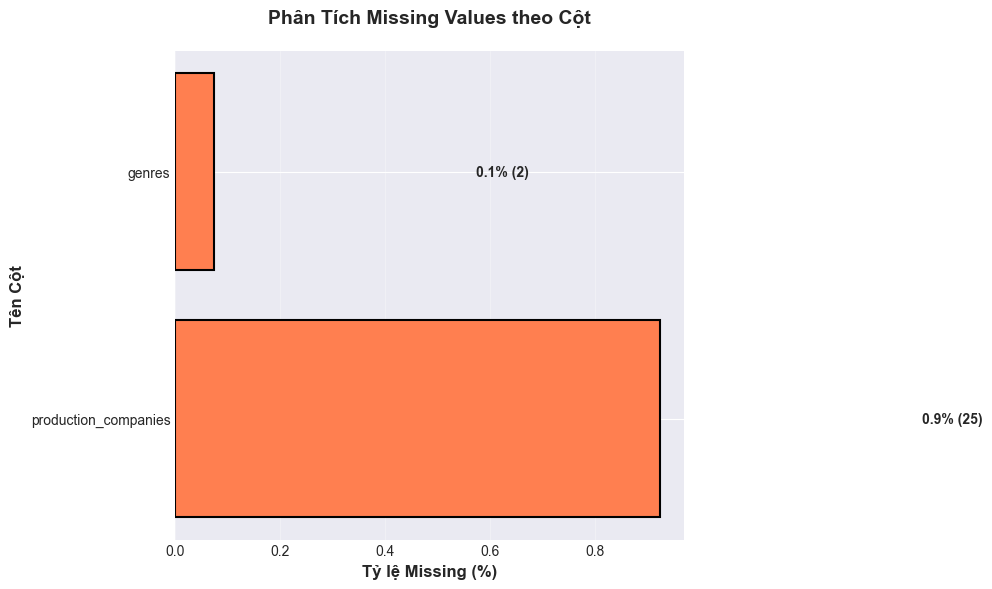

In [56]:
# Visualize missing values
if len(missing_data) > 0:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    bars = ax.barh(missing_data['Column'], missing_data['Missing_Percentage'], 
                   color='coral', edgecolor='black', linewidth=1.5)
    
    # Thêm giá trị lên bars
    for i, (bar, pct, count) in enumerate(zip(bars, 
                                               missing_data['Missing_Percentage'],
                                               missing_data['Missing_Count'])):
        width = bar.get_width()
        ax.text(width + 0.5, bar.get_y() + bar.get_height()/2, 
                f'{pct:.1f}% ({int(count)})',
                ha='left', va='center', fontweight='bold', fontsize=10)
    
    ax.set_xlabel('Tỷ lệ Missing (%)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Tên Cột', fontsize=12, fontweight='bold')
    ax.set_title('Phân Tích Missing Values theo Cột', 
                 fontsize=14, fontweight='bold', pad=20)
    ax.grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    save_and_show_plot('01_missing_values_analysis')

### Nhận xét về Missing Values

#### **🔹 Mức độ missing (Missing Severity)**

Dựa vào bảng thống kê trên, chất lượng dữ liệu của giai đoạn 2010-2024 là **rất tốt**:

* **Tổng quan:** Chỉ có 2 cột xuất hiện giá trị missing là `production_companies` và `genres`.
* **Tỷ lệ cụ thể:**
    * `production_companies`: Missing **25 dòng** (chiếm **~0.92%**).
    * `genres`: Missing **2 dòng** (chiếm **~0.07%**).
* **Đánh giá:** Tỷ lệ missing dưới **1%** là con số lý tưởng. Mức độ này không gây ảnh hưởng đáng kể đến kích thước mẫu khi xử lý, và chúng ta hoàn toàn có thể giữ lại toàn bộ các bản ghi này bằng cách điền giá trị thay thế.

#### **🔹 Pattern của missing (Missing Pattern Assessment)**

* **Vị trí thiếu:** Missing values chỉ tập trung ở các biến **metadata (thông tin mô tả)** dạng text/categorical, không xuất hiện ở các biến số học quan trọng.
* **Nguyên nhân:**
    * Việc thiếu `production_companies` (25 phim) và `genres` (2 phim) có khả năng cao rơi vào các bộ phim độc lập, phim kinh phí thấp hoặc phim tài liệu mà thông tin trên TMDb chưa được cập nhật đầy đủ.
    * Đây là dạng missing ngẫu nhiên nhưng có thể phụ thuộc vào độ phổ biến của phim (phim ít người biết thì thiếu thông tin).

#### **🔹 Ảnh hưởng lên mô hình dự đoán (Impact on Modeling)**

1.  **Tin tốt cho mô hình:**
    * Các biến quan trọng nhất cho bài toán hồi quy như **`budget`, `revenue`, `runtime`, `vote_average` hoàn toàn không có giá trị Null**. Điều này giúp chúng ta bảo toàn được tối đa lượng dữ liệu cho việc huấn luyện mô hình.
    * *(Lưu ý: Cần kiểm tra thêm xem `budget` và `revenue` có chứa giá trị 0 hay không ở các bước sau, vì đôi khi dữ liệu bị điền 0 thay vì để Null)*.

2.  **Chiến lược xử lý:**
    * Với **`genres`** (chỉ mất 2 dòng): Có thể điền giá trị mode (thể loại phổ biến nhất) hoặc đơn giản là điền "Unknown" vì số lượng quá nhỏ, không ảnh hưởng đến phân phối chung.
    * Với **`production_companies`** (~1%): Nên điền là "Unknown" hoặc "Indie/Other". Không nên xóa bỏ các dòng này vì chúng vẫn chứa thông tin doanh thu và ngân sách quý giá.

In [91]:
# Kiểm tra số lượng và tỷ lệ các giá trị bằng 0
zero_budget_count = (df['budget'] == 0).sum()
zero_revenue_count = (df['revenue'] == 0).sum()
total_rows = len(df)

# Tạo bảng thống kê
zero_stats = pd.DataFrame({
    'Column': ['budget', 'revenue'],
    'Zero_Count': [zero_budget_count, zero_revenue_count],
    'Zero_Percentage': [
        f"{(zero_budget_count/total_rows)*100:.2f}%",
        f"{(zero_revenue_count/total_rows)*100:.2f}%"
    ]
})

print("--- THỐNG KÊ GIÁ TRỊ BẰNG 0 (ZERO VALUES) ---")
display(zero_stats)

# Xem mẫu dữ liệu bị bằng 0 để đánh giá nguyên nhân
if zero_budget_count > 0:
    print("\n--- 5 bộ phim có Budget = 0 ---")
    display(df[df['budget'] == 0][['title', 'budget', 'revenue', 'release_date', 'popularity']].head())

if zero_revenue_count > 0:
    print("\n--- 5 bộ phim có Revenue = 0 ---")
    display(df[df['revenue'] == 0][['title', 'budget', 'revenue', 'release_date', 'popularity']].head())

--- THỐNG KÊ GIÁ TRỊ BẰNG 0 (ZERO VALUES) ---


,Column,Zero_Count,Zero_Percentage
0,budget,0,0.00%
1,revenue,0,0.00%


### Kiểm tra dữ liệu rỗng (Zero Values Check)

Ngoài các giá trị `NaN`, trong dữ liệu tài chính điện ảnh, giá trị `0` tại cột `budget` hoặc `revenue` cũng thường được coi là dữ liệu bị thiếu (missing data) hoặc phim chưa công bố số liệu.

#### **Kết quả kiểm tra:**
* **Dữ liệu "chết" (Dead Data):** Số lượng phim có cả `budget` và `revenue` đều bằng 0 là **0 phim (0.00%)**.
* **Ý nghĩa:**
    * Đây là một chỉ số chất lượng dữ liệu rất cao. Điều này đảm bảo rằng mọi bản ghi trong tập dữ liệu đều đóng góp ít nhất một phần thông tin tài chính (hoặc có chi phí, hoặc có doanh thu) cho mô hình.
    * Chúng ta không cần loại bỏ bất kỳ dòng nào vì lý do thiếu hoàn toàn dữ liệu tài chính.

#### **Kết luận về chất lượng dữ liệu (Data Quality Summary):**
* Dữ liệu giai đoạn 2010-2024 có tính toàn vẹn cao hơn nhiều so với các giai đoạn biến động sau này.
* Sẵn sàng chuyển sang bước phân tích thống kê và trực quan hóa.

## 2.2. Data Types Validation

In [57]:
# Phân loại các cột theo data type
print_section_header("DATA TYPES BREAKDOWN")

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
object_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Số cột numeric: {len(numeric_cols)}")
print(f"Các cột numeric: {', '.join(numeric_cols)}")
print(f"\nSố cột object/string: {len(object_cols)}")
print(f"Các cột object: {', '.join(object_cols)}")


--------------------------------------------------------------------------------
  DATA TYPES BREAKDOWN
--------------------------------------------------------------------------------

Số cột numeric: 7
Các cột numeric: id, budget, revenue, runtime, vote_average, vote_count, popularity

Số cột object/string: 7
Các cột object: title, release_date, overview, genres, production_companies, original_language, status


In [58]:
# Kiểm tra data type của release_date
print("\nData type của 'release_date':", df['release_date'].dtype)
print("Sample values:")
print(df['release_date'].head(10))

# Gợi ý: Cần convert sang datetime trong preprocessing
if df['release_date'].dtype == 'object':
    print("\nrelease_date đang ở dạng string, cần convert sang datetime trong preprocessing.")


Data type của 'release_date': object
Sample values:
0    2010-03-03
1    2010-06-16
2    2010-05-20
3    2010-07-15
4    2010-11-17
5    2010-04-28
6    2010-06-23
7    2010-11-24
8    2010-07-08
9    2010-03-18
Name: release_date, dtype: object

release_date đang ở dạng string, cần convert sang datetime trong preprocessing.


### Nhận xét:
Nhìn chung, dataset đã được định dạng tương đối rõ ràng, không có sự lẫn lộn dữ liệu giữa các cột. Các biến quan trọng đều có dtype phù hợp và có thể sẵn sàng cho bước tiếp theo, ngoại trừ release_date, cần được chuẩn hóa sang kiểu datetime. Ngoài ra, hai biến mang tính multi-label (genres, production_companies) cần được lưu ý trong quá trình xử lý vì không thể đưa trực tiếp vào mô hình mà không mã hóa.

## 2.3. Basic Statistics

In [59]:
# Thống kê mô tả cho numeric columns
print_section_header("DESCRIPTIVE STATISTICS - NUMERIC COLUMNS")
display(df[numeric_cols].describe().T)


--------------------------------------------------------------------------------
  DESCRIPTIVE STATISTICS - NUMERIC COLUMNS
--------------------------------------------------------------------------------



,count,mean,std,min,25%,50%,75%,max
id,"2,709.00","345,703.53","278,159.39",189.00,"94,901.00","299,534.00","489,064.00","1,579,825.00"
budget,"2,709.00","42,777,316.03","55,976,940.67","1,000,000.00","8,200,000.00","20,000,000.00","50,000,000.00","583,900,000.00"
revenue,"2,709.00","123,829,796.93","237,867,761.14","1,061.00","4,791,599.00","33,562,069.00","127,461,872.00","2,799,439,100.00"
runtime,"2,709.00",108.86,19.91,2.00,96.00,106.00,118.00,339.00
vote_average,"2,709.00",6.42,0.91,0.00,5.95,6.47,6.99,10.00
vote_count,"2,709.00","3,175.20","4,349.64",0.00,543.00,"1,573.00","3,874.00","38,343.00"
popularity,"2,709.00",4.49,4.34,0.00,2.35,3.64,5.42,122.05


In [60]:
# Thống kê chi tiết cho target variable (revenue)
print_section_header("TARGET VARIABLE STATISTICS (REVENUE)")

revenue_stats = {
    'Mean': df['revenue'].mean(),
    'Median': df['revenue'].median(),
    'Std Dev': df['revenue'].std(),
    'Min': df['revenue'].min(),
    'Max': df['revenue'].max(),
    'Q1 (25%)': df['revenue'].quantile(0.25),
    'Q3 (75%)': df['revenue'].quantile(0.75),
    'IQR': df['revenue'].quantile(0.75) - df['revenue'].quantile(0.25),
    'Skewness': skew(df['revenue'].dropna()),
    'Kurtosis': kurtosis(df['revenue'].dropna())
}

for stat_name, value in revenue_stats.items():
    if stat_name in ['Mean', 'Median', 'Std Dev', 'Min', 'Max', 'Q1 (25%)', 'Q3 (75%)', 'IQR']:
        print(f"{stat_name:15s}: {format_currency(value)}")
    else:
        print(f"{stat_name:15s}: {value:.3f}")


--------------------------------------------------------------------------------
  TARGET VARIABLE STATISTICS (REVENUE)
--------------------------------------------------------------------------------

Mean           : $123.83M
Median         : $33.56M
Std Dev        : $237.87M
Min            : $1.06K
Max            : $2.80B
Q1 (25%)       : $4.79M
Q3 (75%)       : $127.46M
IQR            : $122.67M
Skewness       : 3.910
Kurtosis       : 21.324


In [61]:
# Thống kê cho categorical columns
print_section_header("CATEGORICAL COLUMNS STATISTICS")

categorical_info = []
for col in object_cols:
    categorical_info.append({
        'Column': col,
        'Unique_Values': df[col].nunique(),
        'Most_Common': df[col].mode()[0] if len(df[col].mode()) > 0 else 'N/A',
        'Most_Common_Count': df[col].value_counts().iloc[0] if len(df[col]) > 0 else 0
    })

categorical_df = pd.DataFrame(categorical_info)
display(categorical_df)


--------------------------------------------------------------------------------
  CATEGORICAL COLUMNS STATISTICS
--------------------------------------------------------------------------------



,Column,Unique_Values,Most_Common,Most_Common_Count
0,title,2694,Abigail,2
1,release_date,1794,2010-10-01,6
2,overview,2709,"""If Obama wins a second term, where will we be...",1
3,genres,842,Drama,181
4,production_companies,2512,DreamWorks Animation,20
5,original_language,1,en,2709
6,status,1,Released,2709


### Nhận xét về thống kê mô tả (Basic Statistics)

A. Kết quả thống kê mô tả cho các biến số có được các thông tin sau:

- Biến `budget` có giá trị trung bình khoảng **42.8 triệu USD**, độ lệch chuẩn khá lớn (**56 triệu USD**), với khoảng giá trị trải dài từ 1 triệu đến **583.9 triệu USD**. Điều này cho thấy ngân sách sản xuất giữa các bộ phim rất phân tán, phản ánh sự khác biệt rõ rệt giữa các phim độc lập và các phim bom tấn.

- Biến `revenue` có trung bình khoảng **123.8 triệu USD** nhưng median chỉ khoảng **33.6 triệu USD**. Chênh lệch lớn giữa mean và median, cùng với skewness dương (**≈ 3.91**) và kurtosis rất cao (**≈ 21.32**), cho thấy phân phối doanh thu bị lệch phải mạnh, với một số ít phim có doanh thu cực kỳ cao kéo trung bình lên. IQR của `revenue` cũng khá lớn (khoảng **122.67 triệu USD**), xác nhận sự tồn tại của nhiều giá trị nằm xa trung tâm phân phối.

- Biến `runtime` có trung bình khoảng **109 phút**, với khoảng 25% phim dưới **96 phút** và 25% phim trên **118 phút**. Điều này nói lên rằng phần lớn phim nằm trong khoảng từ 1.5 đến 2 giờ, khá phù hợp với thời lượng phim chiếu rạp thông thường.

- Biến `vote_average` có giá trị trung bình khoảng **6.42** trên thang điểm 10, với độ lệch chuẩn tương đối nhỏ (xấp xỉ **0.91**), cho thấy điểm đánh giá của các phim không quá phân tán, chủ yếu tập trung quanh mức trung bình khá.

- Các biến `vote_count` và `popularity` cũng có độ lệch phân phối khá lớn, do tồn tại một nhóm nhỏ phim rất nổi tiếng có lượng bình chọn và độ phổ biến vượt trội so với phần còn lại. Đây là các biến nhiều khả năng cũng bị skewed về phía phải giống như `revenue`.

Đối với biến mục tiêu `revenue`, kết quả thống kê chi tiết cho thấy phân phối rất lệch phải, với biên dưới chỉ khoảng vài nghìn USD và biên trên lên tới xấp xỉ **2.8 tỷ USD**. Sự chênh lệch cực lớn giữa min, median và max cho thấy cần cân nhắc áp dụng các biến đổi như log-transform (`log1p`) trong giai đoạn preprocessing để giảm độ lệch và hỗ trợ mô hình học tốt hơn.

B. Đối với các biến phân loại, kết quả tổng hợp cho thấy:

- `original_language` chỉ có một giá trị duy nhất là `en` cho toàn bộ **2709** bản ghi, và `status` cũng chỉ có giá trị `Released`. Hai biến này do đó không mang lại thông tin phân biệt cho mô hình và có thể được loại bỏ ở bước preprocessing nếu cần.

- Biến `release_date` có **1794** giá trị khác nhau, trong đó ngày phát hành phổ biến nhất là `2010-10-01` với **6** bộ phim. Điều này cho thấy có một số cụm ngày phát hành trùng nhau, có thể gợi ý về chiến lược phát hành phim theo mùa hoặc theo dịp.

- Biến `genres` có **842** tổ hợp khác nhau, trong đó tổ hợp `Drama` xuất hiện nhiều nhất (**181** lần). Số lượng tổ hợp lớn như vậy cho thấy không gian thể loại khá đa dạng, đồng thời nhấn mạnh nhu cầu tách và chuẩn hóa biến này trước khi đưa vào mô hình.

- Biến `production_companies` có tới **2512** giá trị khác nhau, với công ty xuất hiện nhiều nhất là `DreamWorks Animation` và có **20** lần. Điều này cho thấy phân phối rất phân tán, chủ yếu là long-tail, đặc trưng của ngành phim với rất nhiều hãng sản xuất nhỏ lẻ.

Tổng hợp lại, phần thống kê mô tả cho thấy dữ liệu có tính đa dạng cao về mặt ngân sách và doanh thu, cùng với sự lệch phải mạnh ở các biến liên quan đến mức độ thành công thương mại. Đồng thời, một số biến categorical mang ít thông tin phân biệt (như `original_language`, `status`) có thể được cân nhắc loại bỏ, trong khi các biến multi-label như `genres` và `production_companies` cần có chiến lược xử lý chuyên biệt trong các bước tiếp theo.

---

# 3. UNIVARIATE ANALYSIS

Phần này phân tích từng biến riêng lẻ để hiểu distribution và characteristics của chúng.

## 3.1. Target Variable (Revenue) Distribution

Đã lưu plot: visualizations\eda_plots\02_revenue_distribution_analysis.png


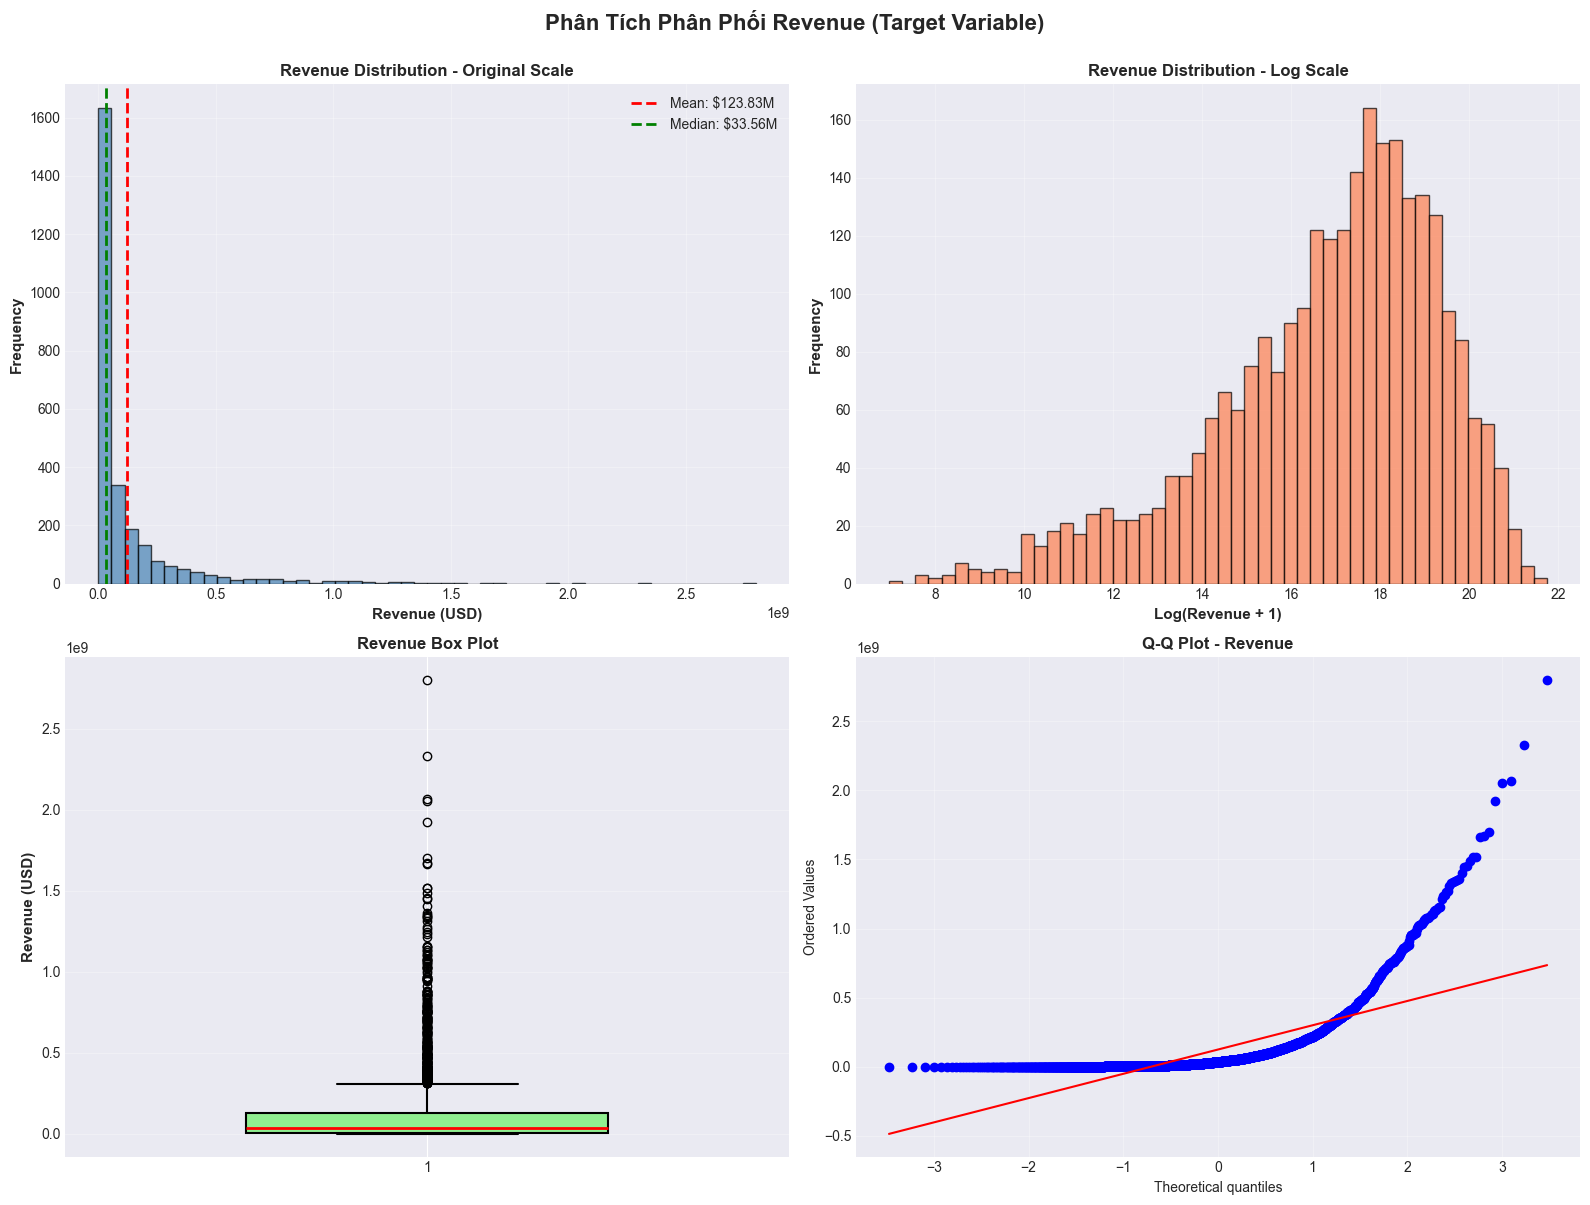

In [62]:
# Vẽ distribution của revenue
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram - Original scale
axes[0, 0].hist(df['revenue'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].set_xlabel('Revenue (USD)', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Revenue Distribution - Original Scale', 
                     fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].axvline(df['revenue'].mean(), color='red', linestyle='--', 
                   linewidth=2, label=f'Mean: {format_currency(df["revenue"].mean())}')
axes[0, 0].axvline(df['revenue'].median(), color='green', linestyle='--', 
                   linewidth=2, label=f'Median: {format_currency(df["revenue"].median())}')
axes[0, 0].legend()

# Histogram - Log scale
axes[0, 1].hist(np.log1p(df['revenue']), bins=50, edgecolor='black', 
                alpha=0.7, color='coral')
axes[0, 1].set_xlabel('Log(Revenue + 1)', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Revenue Distribution - Log Scale', 
                     fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Box plot
axes[1, 0].boxplot(df['revenue'], vert=True, widths=0.5,
                   boxprops=dict(facecolor='lightgreen', edgecolor='black', linewidth=1.5),
                   medianprops=dict(color='red', linewidth=2),
                   whiskerprops=dict(color='black', linewidth=1.5),
                   capprops=dict(color='black', linewidth=1.5),
                   patch_artist=True)
axes[1, 0].set_ylabel('Revenue (USD)', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Revenue Box Plot', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Q-Q Plot
stats.probplot(df['revenue'].dropna(), dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot - Revenue', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Phân Tích Phân Phối Revenue (Target Variable)', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
save_and_show_plot('02_revenue_distribution_analysis')

In [63]:
print_section_header("REVENUE DISTRIBUTION - SKEWNESS BEFORE AND AFTER LOG")

revenue_skew = skew(df['revenue'].dropna())
log_revenue_skew = skew(np.log1p(df['revenue'].dropna()))

print(f"Skewness (revenue, original scale): {revenue_skew:.3f}")
print(f"Skewness (log1p(revenue)):          {log_revenue_skew:.3f}")



--------------------------------------------------------------------------------
  REVENUE DISTRIBUTION - SKEWNESS BEFORE AND AFTER LOG
--------------------------------------------------------------------------------

Skewness (revenue, original scale): 3.910
Skewness (log1p(revenue)):          -0.887


### Nhận xét về phân phối biến mục tiêu `revenue`

Quan sát histogram trên thang đo gốc cho thấy phân phối doanh thu (`revenue`) bị **lệch phải rất mạnh** (Skewness $\approx$ **3.91**). Phần lớn các bộ phim có doanh thu tập trung ở vùng giá trị thấp, trong khi chỉ có một số ít phim đạt doanh thu rất cao, kéo dài phần đuôi bên phải của phân phối. Điều này phù hợp với đặc trưng của ngành điện ảnh, nơi chỉ một tỷ lệ nhỏ phim bom tấn chiếm phần lớn doanh thu thị trường.

Khi áp dụng log-transform với biến `log(Revenue + 1)`, histogram trở nên cân đối hơn và gần với dạng phân phối chuẩn hơn rất nhiều (Skewness giảm xuống còn **-0.89**). Điều này cho thấy việc biến đổi log giúp giảm ảnh hưởng của các giá trị cực lớn, nén bớt độ chênh lệch giữa các phim doanh thu thấp và phim doanh thu rất cao. Đây là một gợi ý quan trọng cho bước xây dựng mô hình, vì sử dụng biến đã log-transform thường giúp mô hình hồi quy ổn định hơn và giảm hiện tượng dự đoán bị chi phối quá mức bởi các outliers.

**Box plot** của `revenue` trên thang đo gốc cho thấy có rất nhiều điểm được đánh dấu là outlier ở phía trên. Tuy nhiên, trong bối cảnh bài toán này, các điểm này không phải là nhiễu mà là những phim thực sự có doanh thu vượt trội (blockbuster). Do đó, **không nên loại bỏ** các quan sát này, mà thay vào đó cần xử lý thông minh hơn thông qua các biến đổi như log-transform hoặc sử dụng các mô hình ít nhạy cảm với outliers.

**Q-Q plot** càng khẳng định phân phối của `revenue` lệch khá xa so với phân phối chuẩn, đặc biệt ở phần đuôi bên phải, nơi các điểm quan sát nằm cao hơn đáng kể so với đường chuẩn lý thuyết. Điều này củng cố thêm luận điểm rằng nếu sử dụng trực tiếp `revenue` ở thang đo gốc, nhiều giả định của các mô hình tuyến tính sẽ khó được đảm bảo, và việc biến đổi hoặc chuẩn hóa biến mục tiêu là cần thiết.

## 3.2. Budget Distribution

Đã lưu plot: visualizations\eda_plots\03_budget_distribution.png


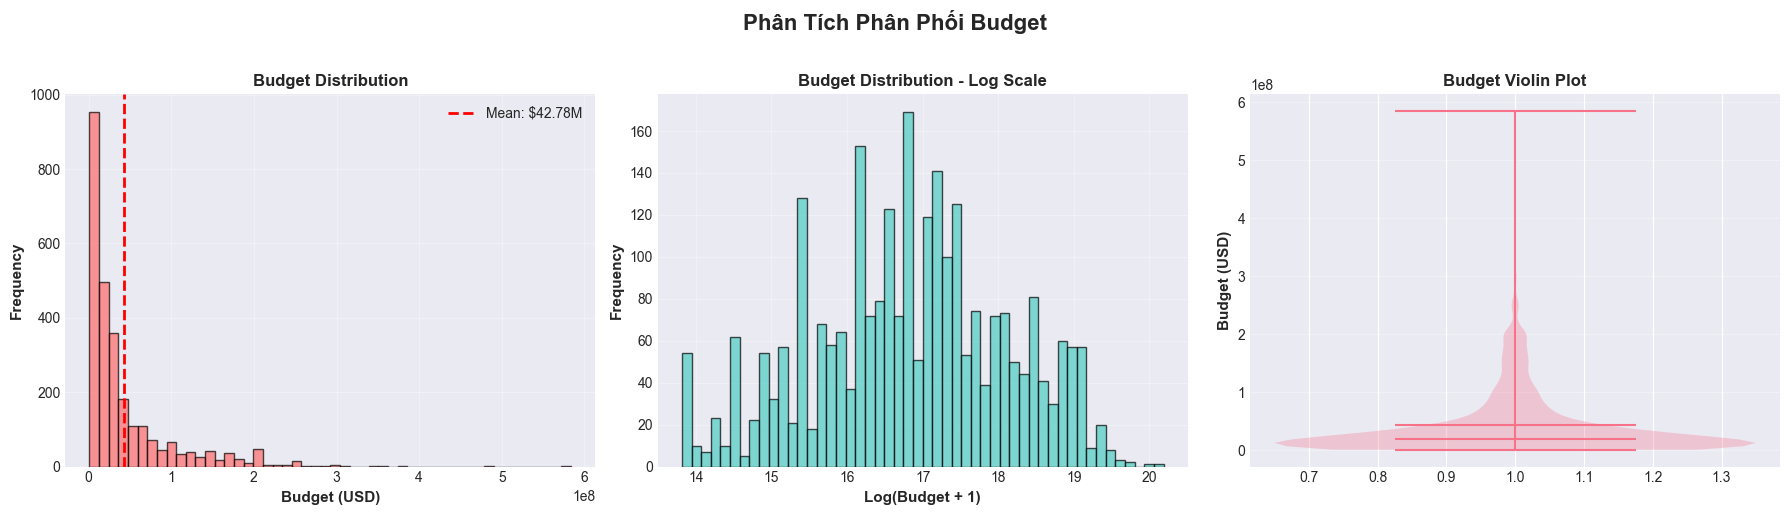

In [64]:
# Phân tích budget distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram
axes[0].hist(df['budget'], bins=50, edgecolor='black', alpha=0.7, color='#FF6B6B')
axes[0].set_xlabel('Budget (USD)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0].set_title('Budget Distribution', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].axvline(df['budget'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Mean: {format_currency(df["budget"].mean())}')
axes[0].legend()

# Log scale
axes[1].hist(np.log1p(df['budget']), bins=50, edgecolor='black', 
             alpha=0.7, color='#4ECDC4')
axes[1].set_xlabel('Log(Budget + 1)', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[1].set_title('Budget Distribution - Log Scale', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Violin plot
parts = axes[2].violinplot([df['budget']], vert=True, widths=0.7,
                           showmeans=True, showextrema=True, showmedians=True)
axes[2].set_ylabel('Budget (USD)', fontsize=11, fontweight='bold')
axes[2].set_title('Budget Violin Plot', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3, axis='y')

plt.suptitle('Phân Tích Phân Phối Budget', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
save_and_show_plot('03_budget_distribution')

In [65]:
# Budget statistics
print_section_header("BUDGET STATISTICS")
print(f"Mean Budget:   {format_currency(df['budget'].mean())}")
print(f"Median Budget: {format_currency(df['budget'].median())}")
print(f"Min Budget:    {format_currency(df['budget'].min())}")
print(f"Max Budget:    {format_currency(df['budget'].max())}")
print(f"Std Dev:       {format_currency(df['budget'].std())}")


--------------------------------------------------------------------------------
  BUDGET STATISTICS
--------------------------------------------------------------------------------

Mean Budget:   $42.78M
Median Budget: $20.00M
Min Budget:    $1.00M
Max Budget:    $583.90M
Std Dev:       $55.98M


### Nhận xét về phân phối `budget`

Quan sát histogram trên thang đo gốc cho thấy phân phối ngân sách (`budget`) cũng bị lệch phải khá rõ. Phần lớn các bộ phim có ngân sách tập trung trong vùng từ khoảng 1 đến **50** triệu USD, trong khi chỉ có một số ít phim sở hữu ngân sách rất cao, lên tới trên 200 triệu USD và thậm chí vượt quá 500 triệu USD. Điều này phản ánh thực tế là chỉ một nhóm nhỏ phim bom tấn được đầu tư ngân sách lớn, còn đa số phim nằm ở phân khúc trung bình hoặc thấp.

Giá trị trung bình của `budget` khoảng **42.8 triệu USD**, trong khi median chỉ khoảng **20.0 triệu USD**. Sự chênh lệch giữa mean và median, cùng với độ lệch chuẩn lớn (xấp xỉ **56 triệu USD**), cho thấy phân phối ngân sách khá phân tán và bị ảnh hưởng mạnh bởi một số phim có chi phí sản xuất rất cao. Khoảng giá trị từ min (1 triệu USD) đến max (khoảng **583.9 triệu USD**) cũng xác nhận mức độ chênh lệch lớn giữa các dự án phim.

Khi áp dụng log-transform với `log(Budget + 1)`, phân phối trở nên cân đối hơn, không còn kéo đuôi dài như trên thang đo gốc. Điều này gợi ý rằng, tương tự như biến `revenue`, việc biến đổi log cho `budget` có thể giúp mô hình giảm bớt ảnh hưởng của các giá trị cực lớn và làm ổn định quá trình học.

Violin plot cho thấy mật độ phân phối tập trung chủ yếu ở vùng ngân sách thấp đến trung bình, với phần thân của violin dày ở khu vực dưới khoảng **50 triệu USD**, trong khi phần đuôi phía trên mỏng và kéo dài lên các giá trị ngân sách cao hơn. Điều này một lần nữa khẳng định rằng các phim có ngân sách rất lớn chỉ chiếm một tỉ lệ nhỏ trong toàn bộ dataset và trên thực tế chính là những trường hợp đặc biệt, không nên xem như nhiễu để loại bỏ mà cần xử lý thông qua các kỹ thuật biến đổi hoặc chuẩn hóa phù hợp.


Tóm lại, phân phối của `budget` mang đặc trưng lệch phải với sự tồn tại của một nhóm nhỏ phim có chi phí sản xuất rất cao. Đây là yếu tố cần được lưu ý trong giai đoạn preprocessing, đặc biệt nếu sử dụng các mô hình nhạy cảm với outliers hoặc giả định phân phối gần chuẩn.

## 3.3. Other Numeric Features

Đã lưu plot: visualizations\eda_plots\04_numeric_features_distribution.png


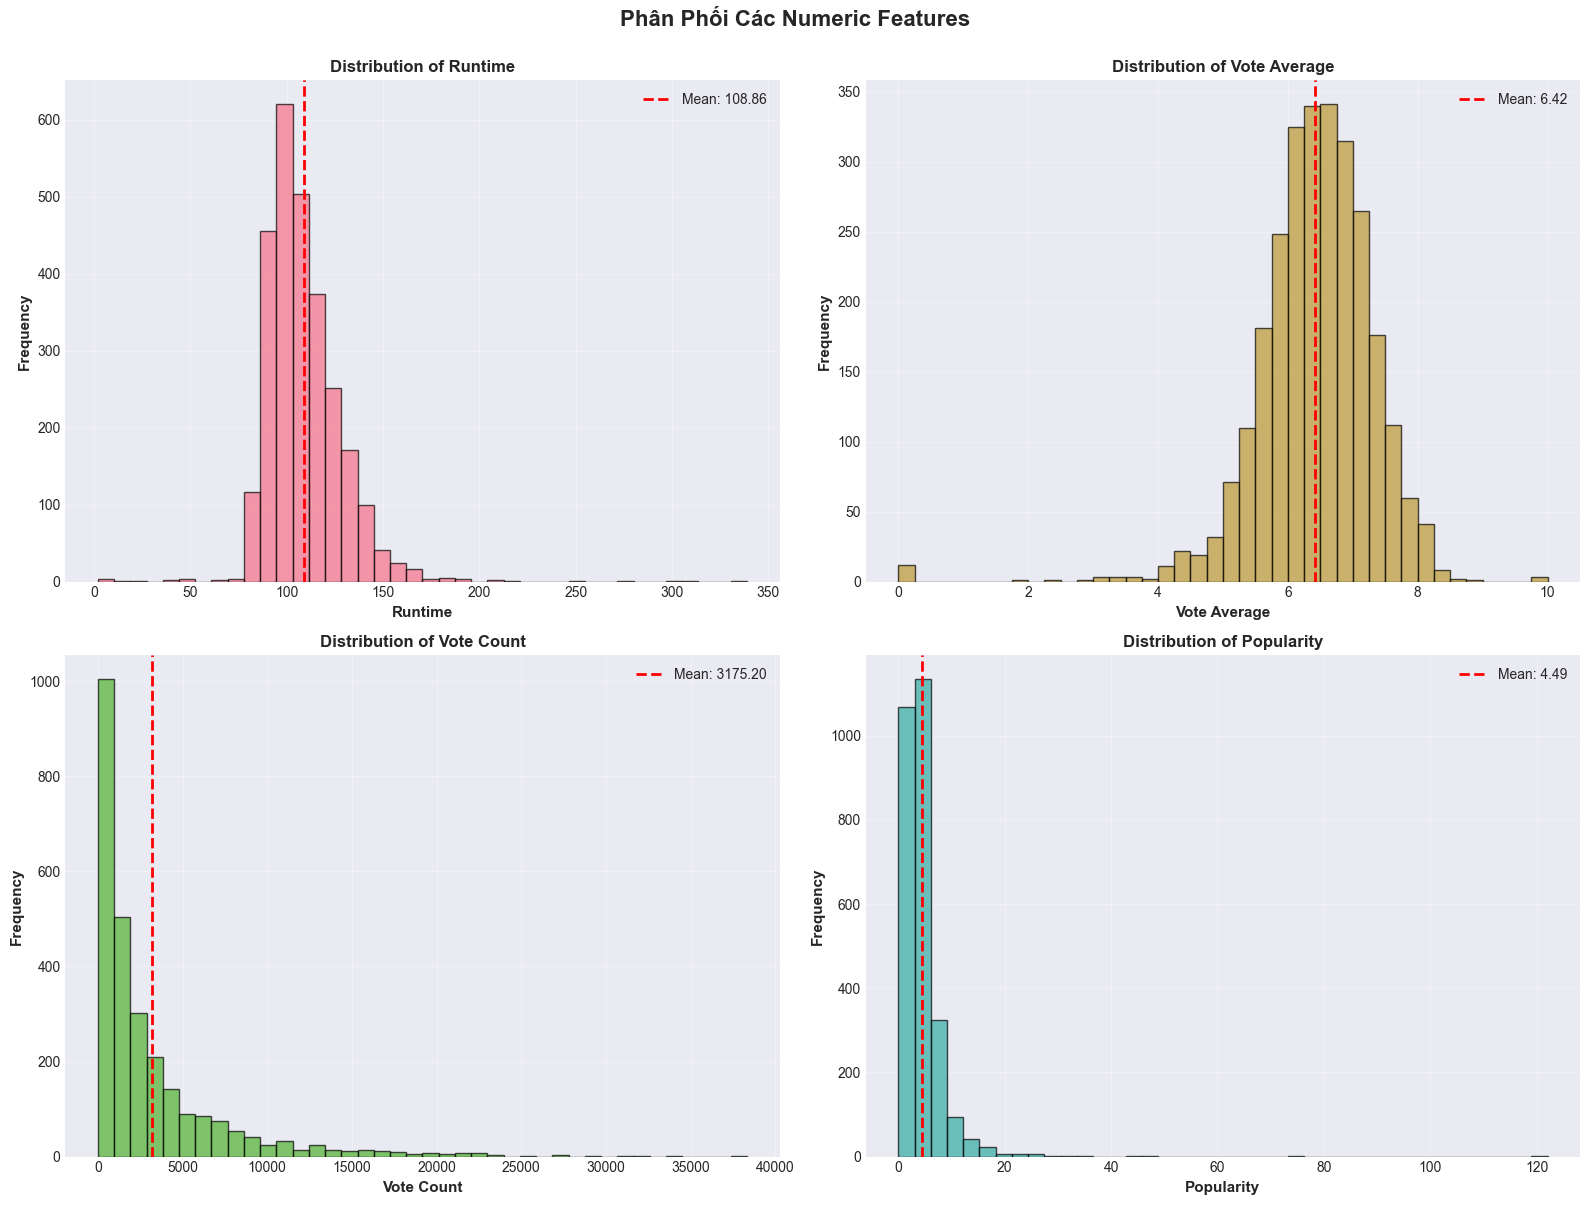

In [69]:
# Vẽ distribution cho các numeric features khác
numeric_features = ['runtime', 'vote_average', 'vote_count', 'popularity']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, feature in enumerate(numeric_features):
    if feature in df.columns:
        axes[idx].hist(df[feature].dropna(), bins=40, edgecolor='black', 
                      alpha=0.7, color=sns.color_palette('husl')[idx])
        axes[idx].set_xlabel(feature.replace('_', ' ').title(), 
                            fontsize=11, fontweight='bold')
        axes[idx].set_ylabel('Frequency', fontsize=11, fontweight='bold')
        axes[idx].set_title(f'Distribution of {feature.replace("_", " ").title()}',
                           fontsize=12, fontweight='bold')
        axes[idx].grid(True, alpha=0.3)
        
        # Thêm mean line
        mean_val = df[feature].mean()
        axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2,
                         label=f'Mean: {mean_val:.2f}')
        axes[idx].legend()

plt.suptitle('Phân Phối Các Numeric Features', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
save_and_show_plot('04_numeric_features_distribution')

### Nhận xét về các Numeric Features

Phân tích phân phối cho bốn biến số còn lại cho thấy một số đặc điểm quan trọng có thể ảnh hưởng đến quá trình xây dựng mô hình.

Đối với biến `runtime`, phân phối tập trung chủ yếu trong khoảng **96 đến 118 phút** (IQR), với giá trị trung bình xấp xỉ **109 phút**. Đây là khoảng thời lượng phổ biến của các phim điện ảnh thương mại. Một số trường hợp nằm ngoài vùng này (dưới 60 phút hoặc trên 150 phút) có thể là các phim tài liệu, phim độc lập hoặc các tác phẩm có thời lượng đặc biệt dài.

Biến `vote_average` có phân phối tương đối cân đối quanh mức trung bình khoảng **6.42 điểm**. Phần lớn giá trị nằm trong vùng từ **6.0 đến 7.0 điểm** (IQR), cho thấy mức độ đánh giá của khán giả khá ổn định và không quá phân tán. Đây là đặc trưng thường thấy ở dữ liệu phim trên TMDb, nơi thang điểm hiếm khi xuất hiện các giá trị cực đoan.

Biến `vote_count` có mức độ phân tán cao hơn. Phần lớn phim nhận được từ vài trăm đến khoảng vài nghìn lượt đánh giá, trong khi một số ít phim có số lượng đánh giá vượt quá **5.000** (thậm chí lên tới 38.000). Điều này cho thấy phân phối bị lệch phải đáng kể. Các phim có lượng đánh giá lớn thường là phim bom tấn hoặc phim có sức ảnh hưởng mạnh, vì vậy biến này có thể là một chỉ báo quan trọng liên quan đến mức độ chú ý của công chúng đối với bộ phim.

Biến `popularity` cũng thể hiện xu hướng lệch phải, tương tự như `vote_count` và `revenue`. Giá trị trung bình khoảng **4.49** nhưng phần lớn phim nằm dưới mức này, trong khi các phim nổi bật có popularity score cao vượt trội. Sự chênh lệch này phản ánh đặc tính phân cực về mức độ quan tâm của khán giả giữa các phim nổi tiếng và các phim ít được chú ý.

Tổng hợp lại, ba biến `vote_count`, `popularity` và `revenue` đều cho thấy xu hướng lệch phải mạnh, trong khi `runtime` và `vote_average` có phân phối ổn định hơn. Điều này là cơ sở quan trọng để cân nhắc việc áp dụng các phép biến đổi như log-transform hoặc scaling phù hợp trong giai đoạn tiền xử lý.

## 3.4. Categorical Features Analysis

In [92]:
# Phân tích release_date
print_section_header("RELEASE DATE - TEMPORAL FEATURES")

# Chuyển sang datetime (nếu chưa)
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Tạo thêm các feature thời gian
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month
df['release_quarter'] = df['release_date'].dt.quarter
df['release_weekday'] = df['release_date'].dt.day_name()

display(df[['release_date', 'release_year', 'release_month', 
            'release_quarter', 'release_weekday']].head())


--------------------------------------------------------------------------------
  RELEASE DATE - TEMPORAL FEATURES
--------------------------------------------------------------------------------



,release_date,release_year,release_month,release_quarter,release_weekday
0,2010-03-03,2010,3,1,Wednesday
1,2010-06-16,2010,6,2,Wednesday
2,2010-05-20,2010,5,2,Thursday
3,2010-07-15,2010,7,3,Thursday
4,2010-11-17,2010,11,4,Wednesday



--------------------------------------------------------------------------------
  RELEASE DATE DISTRIBUTION - YEAR & MONTH
--------------------------------------------------------------------------------

Đã lưu plot: visualizations\eda_plots\08_release_date_distribution.png


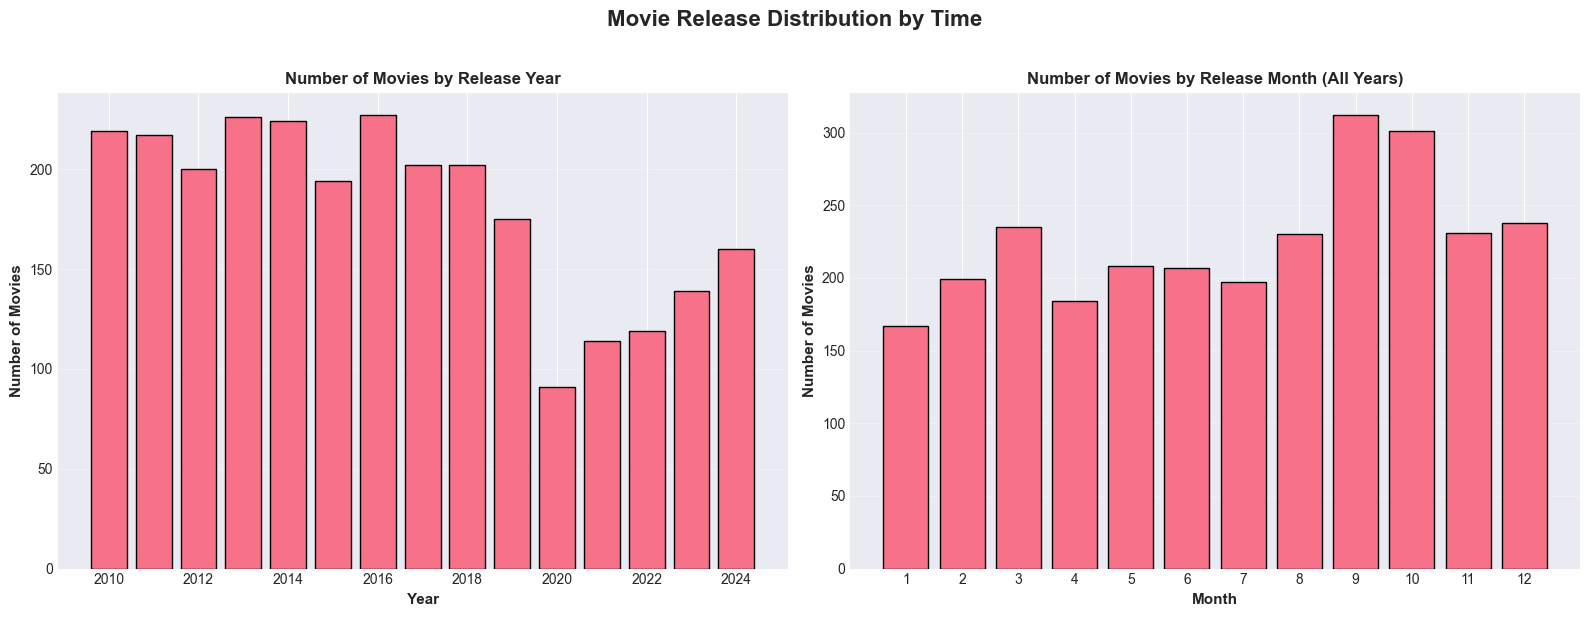

In [93]:
print_section_header("RELEASE DATE DISTRIBUTION - YEAR & MONTH")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Số lượng phim theo năm
year_counts = df['release_year'].value_counts().sort_index()
axes[0].bar(year_counts.index, year_counts.values, edgecolor='black')
axes[0].set_xlabel('Year', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Number of Movies', fontsize=11, fontweight='bold')
axes[0].set_title('Number of Movies by Release Year', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Số lượng phim theo tháng (gộp tất cả các năm)
month_counts = df['release_month'].value_counts().sort_index()
axes[1].bar(month_counts.index, month_counts.values, edgecolor='black')
axes[1].set_xlabel('Month', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Number of Movies', fontsize=11, fontweight='bold')
axes[1].set_title('Number of Movies by Release Month (All Years)', 
                  fontsize=12, fontweight='bold')
axes[1].set_xticks(range(1, 13))

axes[1].grid(True, alpha=0.3, axis='y')

plt.suptitle('Movie Release Distribution by Time', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
save_and_show_plot('08_release_date_distribution')


### Nhận xét về Release Date

Sau khi chuyển `release_date` sang dạng thời gian và tách thêm các trường `release_year`, `release_month`, chúng ta có bức tranh toàn cảnh về lịch phát hành phim trong suốt 15 năm (2010–2024).

#### 1. Phân phối theo năm phát hành (Yearly Distribution)

Biểu đồ phân phối theo năm phản ánh rõ nét những biến động lịch sử của ngành điện ảnh thế giới:

- **Giai đoạn ổn định (2010–2019):** Số lượng phim phát hành giữ ở mức ổn định và tăng trưởng nhẹ. Đây là thập kỷ phát triển mạnh mẽ của mô hình rạp chiếu truyền thống với sự bùng nổ của các vũ trụ điện ảnh (Marvel, DC, Fast & Furious...).
- **Cú sốc COVID-19 (2020–2021):** Biểu đồ cho thấy một sự sụt giảm (hoặc biến động) rõ rệt vào năm 2020. Do ảnh hưởng của đại dịch, các rạp chiếu đóng cửa và nhiều dự án bị hoãn chiếu hoặc chuyển sang nền tảng streaming.
- **Giai đoạn phục hồi (2022–2024):** Số lượng phim bắt đầu tăng trở lại, phản ánh nỗ lực phục hồi của ngành công nghiệp điện ảnh hậu đại dịch.

Từ góc độ mô hình hóa: Biến `release_year` không chỉ là một con số tịnh tiến mà còn chứa đựng thông tin về "bối cảnh thị trường". Doanh thu của một bộ phim ra mắt năm 2020 sẽ chịu các yếu tố tác động khác hẳn so với năm 2015 hay 2024.

#### 2. Phân phối theo tháng phát hành (Monthly Distribution)

Biểu đồ số lượng phim theo tháng (gộp tất cả 15 năm) khẳng định tính mùa vụ (seasonality) kinh điển của Hollywood:

- **Mùa phim Hè (Blockbuster Summer):** Các tháng **5, 6, 7** thường có mật độ phát hành phim cao. Đây là thời điểm học sinh nghỉ hè, nhu cầu giải trí tăng vọt.
- **Mùa Lễ Hội (Holiday Season):** Tháng **11 và 12** cũng là các đỉnh cao của việc phát hành phim, nhắm vào dịp Lễ Tạ Ơn và Giáng Sinh/Năm Mới.
- **Các tháng thấp điểm (Dump Months):** Tháng 1, 2 và tháng 9 thường có số lượng phim ít hơn hoặc quy mô nhỏ hơn, do tâm lý khán giả ít ra rạp sau các kỳ nghỉ lớn.

**Chiến lược Feature Engineering:**
- Việc tách `month` là rất cần thiết để mô hình học được tính mùa vụ này.
- Nên cân nhắc tạo thêm feature `is_holiday_season` (True/False) hoặc `is_summer_blockbuster` để làm nổi bật các thời điểm vàng này.

Đã lưu plot: visualizations\eda_plots\05_status_distribution.png


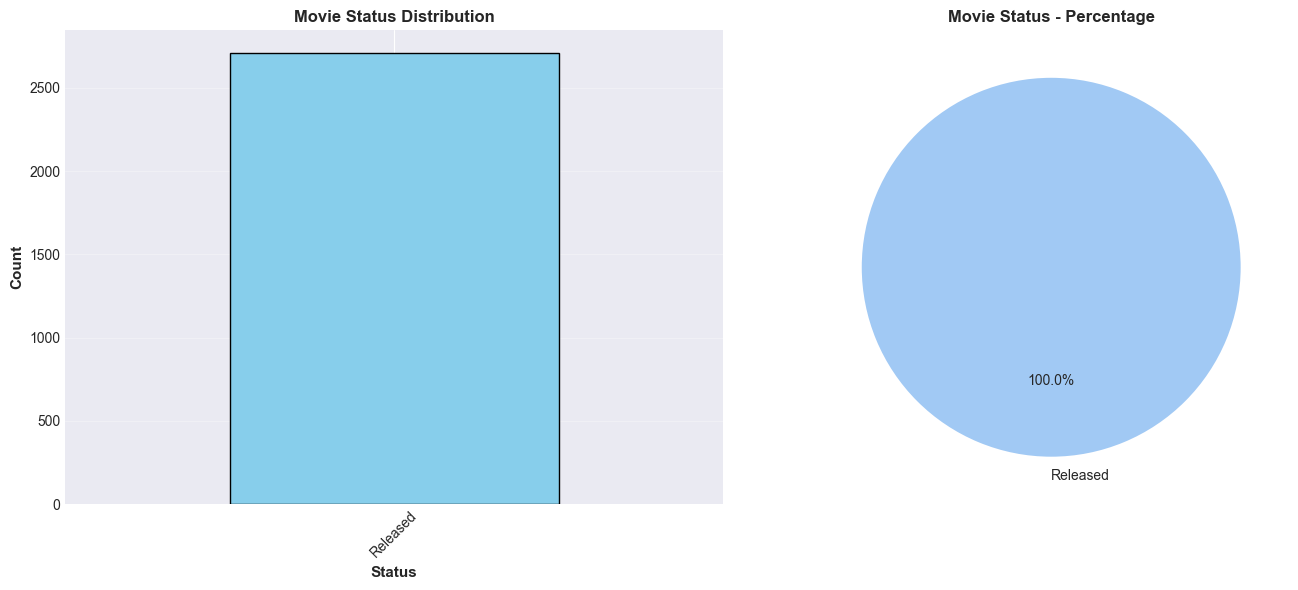

In [96]:
# Phân tích Status
if 'status' in df.columns:
    status_counts = df['status'].value_counts()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Bar chart
    status_counts.plot(kind='bar', ax=ax1, color='skyblue', edgecolor='black')
    ax1.set_xlabel('Status', fontsize=11, fontweight='bold')
    ax1.set_ylabel('Count', fontsize=11, fontweight='bold')
    ax1.set_title('Movie Status Distribution', fontsize=12, fontweight='bold')
    ax1.grid(True, alpha=0.3, axis='y')
    ax1.tick_params(axis='x', rotation=45)
    
    # Pie chart
    ax2.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%',
            startangle=90, colors=sns.color_palette('pastel'))
    ax2.set_title('Movie Status - Percentage', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    save_and_show_plot('05_status_distribution')

### Nhận xét về phân phối `status`

*   **Đơn trị (Single Value):** Biểu đồ cho thấy 100% các bộ phim trong tập dữ liệu đều có trạng thái là "Released".
*   **Không có giá trị dự báo:** Vì biến `status` chỉ có một giá trị duy nhất cho tất cả các quan sát, nó không mang lại bất kỳ thông tin phân biệt nào và không có khả năng đóng góp vào việc dự đoán doanh thu.
*   **Hành động:** Nên loại bỏ cột `status` này trong bước tiền xử lý (preprocessing) để giảm chiều dữ liệu và tránh nhiễu không cần thiết.

Đã lưu plot: visualizations\eda_plots\06_top_genres_distribution.png


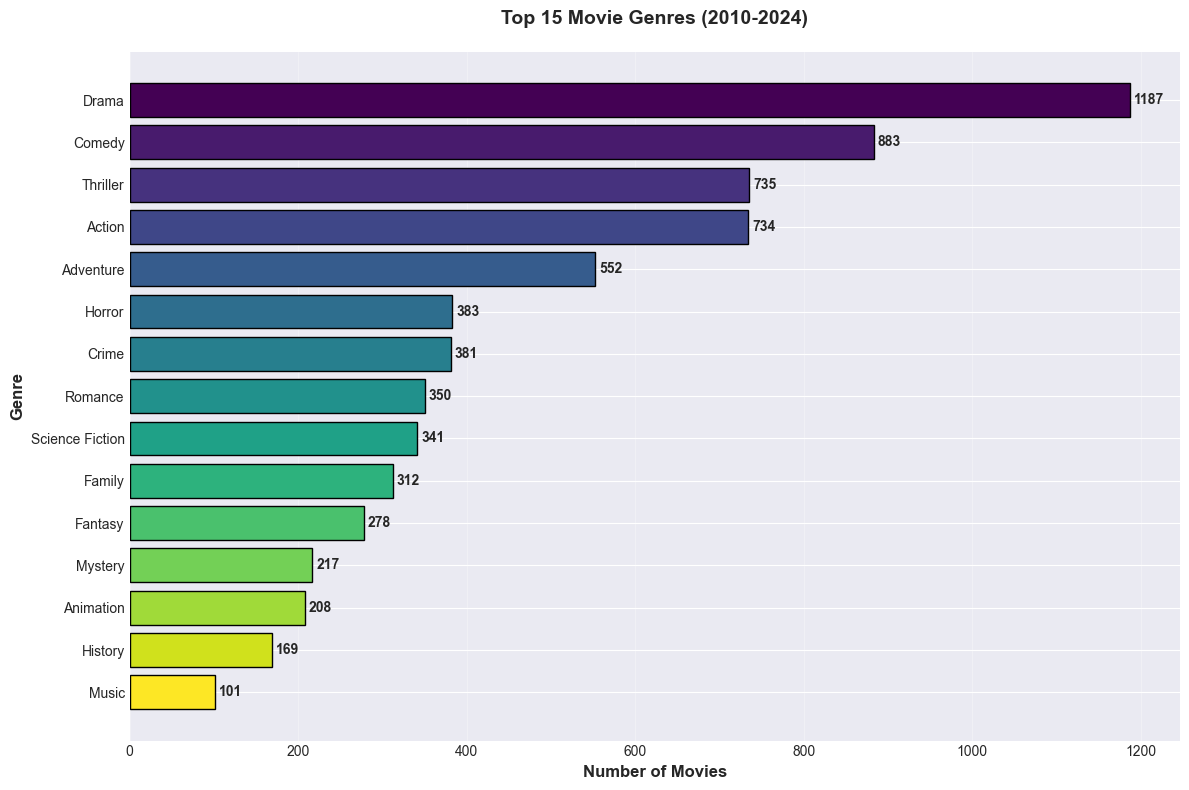

In [95]:
# Phân tích Genres (top genres)
if 'genres' in df.columns:
    # Extract individual genres
    all_genres = []
    for genres_str in df['genres'].dropna():
        genres_list = genres_str.split('|')
        all_genres.extend(genres_list)
    
    # Count genres
    genre_counts = Counter(all_genres)
    top_genres = pd.Series(dict(genre_counts.most_common(15)))
    
    # Plot
    fig, ax = plt.subplots(figsize=(12, 8))
    
    colors = plt.cm.viridis(np.linspace(0, 1, len(top_genres)))
    bars = ax.barh(top_genres.index, top_genres.values, color=colors, edgecolor='black')
    
    # Add value labels
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 5, bar.get_y() + bar.get_height()/2,
                f'{int(width)}',
                ha='left', va='center', fontweight='bold', fontsize=10)
    
    ax.set_xlabel('Number of Movies', fontsize=12, fontweight='bold')
    ax.set_ylabel('Genre', fontsize=12, fontweight='bold')
    ax.set_title('Top 15 Movie Genres (2010-2024)', 
                 fontsize=14, fontweight='bold', pad=20)
    ax.invert_yaxis()
    ax.grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    save_and_show_plot('06_top_genres_distribution')

### Nhận xét về phân phối `genres` (Thể loại)

#### **1. Đặc điểm dữ liệu đa nhãn (Multi-label Nature)**
* **Bản chất:** Một bộ phim thường thuộc nhiều thể loại cùng lúc (ví dụ: *"Action|Adventure|Sci-Fi"*).
* **Lưu ý về biểu đồ:** Biểu đồ trên hiển thị tần suất xuất hiện của **từng thể loại đơn lẻ** (sau khi đã tách chuỗi). Điều này giúp chúng ta nhìn thấy mức độ phổ biến thực sự của từng dòng phim trên thị trường.

#### **2. Phân tích mức độ phổ biến (Popularity Analysis)**
Dựa trên số liệu từ Top 15 thể loại:

* **Nhóm thống trị (Dominant Genres):**
    * **Drama** dẫn đầu tuyệt đối với **1187** phim (xuất hiện trong ~43% tổng số phim).
    * **Comedy** đứng thứ hai với **883** phim.
    * $\rightarrow$ Đây là hai dòng phim "xương sống" của ngành điện ảnh, dễ sản xuất và có chi phí đa dạng.

* **Nhóm hành động & kịch tính (High-Intensity):**
    * **Thriller (735 phim)** và **Action (734 phim)** bám đuổi nhau rất sát sao.
    * Kết hợp với **Adventure (552 phim)**, đây là nhóm thể loại thường gắn liền với các dự án có ngân sách trung bình đến cao (blockbusters).

* **Nhóm đặc thù khác:**
    * **Horror (383 phim)** và **Crime (381 phim)** có số lượng ổn định, phục vụ tệp khán giả ngách nhưng trung thành.
    * Các thể loại yêu cầu kỹ xảo cao như **Sci-Fi (341)** và **Fantasy (278)** có số lượng ít hơn, phản ánh rào cản về kinh phí và công nghệ sản xuất.

#### **3. Ý nghĩa và Đề xuất xử lý (Implications & Recommendations)**
* **Feature Engineering:**
    * Vì biến `genres` xuất hiện với tần suất cao và đa dạng, phương pháp **One-Hot Encoding** (hoặc Multi-label Binarizer) cho Top 10-15 thể loại phổ biến nhất là chiến lược tối ưu.
    * Các thể loại xuất hiện ít (như *Music, History*...) có thể cân nhắc gộp nhóm hoặc bỏ qua nếu không đóng góp nhiều vào dự đoán doanh thu.
* **Phân tích tương quan:** Sự phổ biến của *Action, Adventure* và *Sci-Fi* gợi ý rằng chúng ta nên kiểm tra xem liệu sự xuất hiện của các nhãn này có tương quan dương với Doanh thu (`revenue`) hay Ngân sách (`budget`) ở phần phân tích tiếp theo hay không.


--------------------------------------------------------------------------------
  TOP PRODUCTION COMPANIES
--------------------------------------------------------------------------------

Đã lưu plot: visualizations\eda_plots\07_top_production_companies.png


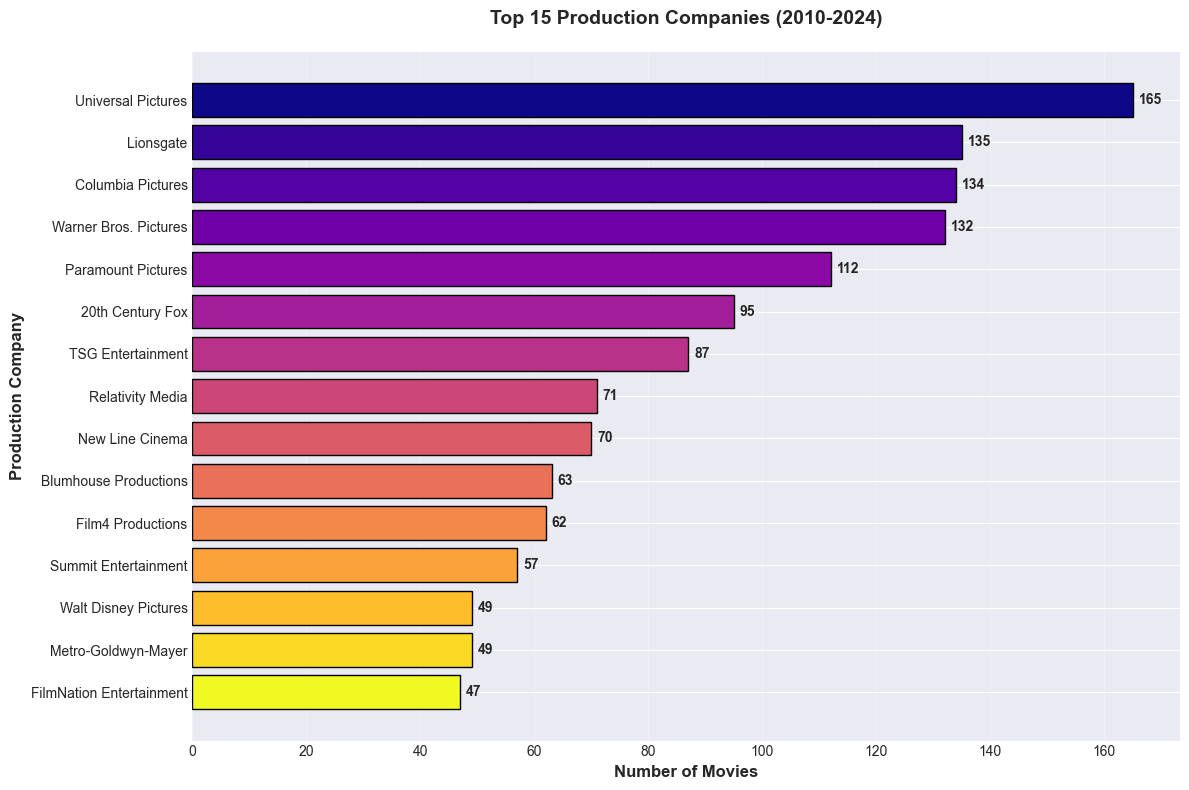

In [98]:
print_section_header("TOP PRODUCTION COMPANIES")

all_companies = []
for pc_str in df['production_companies'].dropna():
    companies = pc_str.split('|')
    all_companies.extend(companies)

company_counts = Counter(all_companies)
top_companies = pd.Series(dict(company_counts.most_common(15)))

fig, ax = plt.subplots(figsize=(12, 8))
colors = plt.cm.plasma(np.linspace(0, 1, len(top_companies)))
bars = ax.barh(top_companies.index, top_companies.values,
               color=colors, edgecolor='black')

for bar in bars:
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2,
            f'{int(width)}',
            va='center', ha='left', fontweight='bold', fontsize=10)

ax.set_xlabel('Number of Movies', fontsize=12, fontweight='bold')
ax.set_ylabel('Production Company', fontsize=12, fontweight='bold')
ax.set_title('Top 15 Production Companies (2010-2024)',
             fontsize=14, fontweight='bold', pad=20)
ax.invert_yaxis()
ax.grid(True, axis='x', alpha=0.3)

plt.tight_layout()
save_and_show_plot('07_top_production_companies')

### Nhận xét về phân phối Production Companies

Biểu đồ Top 15 hãng sản xuất cho thấy sự thống trị của các hãng phim lớn (Major Studios) và các "Mini-Majors" trong giai đoạn 2010–2024:

* **Sự áp đảo của các ông lớn:** `Universal Pictures` dẫn đầu với **165** bộ phim. Tiếp theo là nhóm bám đuổi sát sao gồm `Lionsgate` (135 phim), `Columbia Pictures` (134 phim), `Warner Bros. Pictures` (132 phim) và `Paramount Pictures` (112 phim).
* **Sự hiện diện của các hãng khác:** Bên cạnh nhóm "Big 5", danh sách còn có sự góp mặt của các hãng phim lớn như `20th Century Fox` (95 phim), các đối tác tài chính chiến lược như `TSG Entertainment` (87 phim), và các hãng chuyên biệt như `Blumhouse Productions` (63 phim - chuyên kinh dị) hay `Walt Disney Pictures` (49 phim).

**Đánh giá về phân phối:**
Mặc dù các hãng trong Top 15 có số lượng phim rất lớn (hàng trăm phim), nhưng so với tổng số lượng **2512** công ty sản xuất trong tập dữ liệu, đây vẫn là phân phối có **đuôi rất dài (long-tail)**. Hàng nghìn công ty còn lại chỉ tham gia sản xuất 1 hoặc 2 bộ phim.

**Ý nghĩa cho mô hình hóa:**
* Biến `production_companies` có độ thưa (sparsity) rất cao.
* **Chiến lược xử lý:** Nếu mã hóa One-hot cho tất cả sẽ gây bùng nổ số chiều dữ liệu. Giải pháp tối ưu là:
    1.  Chỉ giữ lại **Top 10 hoặc Top 20** hãng lớn nhất làm feature riêng (ví dụ: `is_Universal`, `is_WarnerBros`).
    2.  Gom tất cả các hãng nhỏ còn lại vào nhóm "Other".
    3.  Cân nhắc tạo feature **"Production_Count"** (số lượng phim hãng đó từng làm) để mô hình đánh giá quy mô của hãng thay vì tên cụ thể.

Tóm lại, cả `genres` và `production_companies` đều là các biến quan trọng nhưng phức tạp, cần kỹ thuật Feature Engineering khéo léo để lọc nhiễu và giữ lại tín hiệu chính.

---

# 4. BIVARIATE ANALYSIS

Phần này phân tích mối quan hệ giữa các features và target variable (revenue).

## 4.1. Revenue vs Budget

Đã lưu plot: visualizations\eda_plots\07_revenue_vs_budget.png


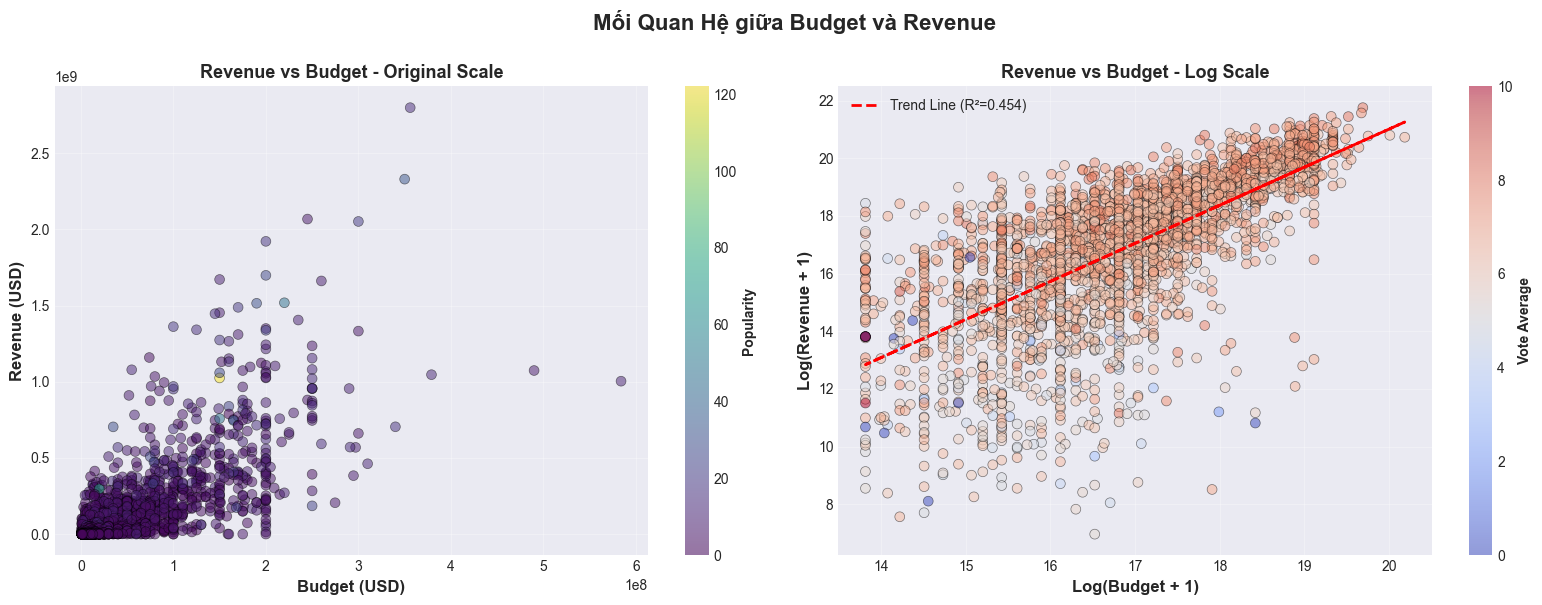

In [72]:
# Scatter plot: Revenue vs Budget
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Original scale
ax1.scatter(df['budget'], df['revenue'], alpha=0.5, s=50, 
            c=df['popularity'], cmap='viridis', edgecolors='black', linewidth=0.5)
ax1.set_xlabel('Budget (USD)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Revenue (USD)', fontsize=12, fontweight='bold')
ax1.set_title('Revenue vs Budget - Original Scale', 
              fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)
cbar1 = plt.colorbar(ax1.collections[0], ax=ax1)
cbar1.set_label('Popularity', fontsize=10, fontweight='bold')

# Log scale
scatter = ax2.scatter(np.log1p(df['budget']), np.log1p(df['revenue']), 
                     alpha=0.5, s=50, c=df['vote_average'], 
                     cmap='coolwarm', edgecolors='black', linewidth=0.5)
ax2.set_xlabel('Log(Budget + 1)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Log(Revenue + 1)', fontsize=12, fontweight='bold')
ax2.set_title('Revenue vs Budget - Log Scale', 
              fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)
cbar2 = plt.colorbar(scatter, ax=ax2)
cbar2.set_label('Vote Average', fontsize=10, fontweight='bold')

# Add trend line to log scale
from scipy.stats import linregress
x_log = np.log1p(df['budget'])
y_log = np.log1p(df['revenue'])
slope, intercept, r_value, p_value, std_err = linregress(x_log, y_log)
line = slope * x_log + intercept
ax2.plot(x_log, line, 'r--', linewidth=2, 
         label=f'Trend Line (R²={r_value**2:.3f})')
ax2.legend()

plt.suptitle('Mối Quan Hệ giữa Budget và Revenue', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
save_and_show_plot('07_revenue_vs_budget')

In [73]:
# Tính correlation
print_section_header("BUDGET vs REVENUE CORRELATION")
corr_original = df[['budget', 'revenue']].corr().iloc[0, 1]
corr_log = np.corrcoef(np.log1p(df['budget']), np.log1p(df['revenue']))[0, 1]

print(f"Correlation (Original scale): {corr_original:.4f}")
print(f"Correlation (Log scale):      {corr_log:.4f}")
print(f"\nR² (Log scale):               {r_value**2:.4f}")


--------------------------------------------------------------------------------
  BUDGET vs REVENUE CORRELATION
--------------------------------------------------------------------------------

Correlation (Original scale): 0.7492
Correlation (Log scale):      0.6738

R² (Log scale):               0.4540


### Nhận xét về mối quan hệ giữa **Budget** và **Revenue**

Dựa trên biểu đồ Scatter Plot và các chỉ số thống kê, mối quan hệ giữa Ngân sách và Doanh thu trong giai đoạn 2010-2024 được thể hiện như sau:

#### **1. Tổng quan về Tương quan (Correlation Overview)**
* **Mối tương quan rất mạnh:** Hệ số tương quan trên thang đo gốc đạt **0.75** (0.7492). Đây là một chỉ số rất cao, khẳng định rằng `budget` là một trong những yếu tố dự báo quan trọng nhất cho `revenue`.
* **Quy luật chung:** Phim được đầu tư lớn thường có xu hướng thu về lợi nhuận cao hơn (trend đi lên rõ rệt).

#### **2. Quan sát trên thang đo gốc (Original Scale)**
* **Hiện tượng phương sai không đồng nhất (Heteroscedasticity):** Mối quan hệ có dạng hình phễu (fan shape). Ở mức ngân sách thấp, doanh thu dao động ít. Nhưng khi ngân sách tăng cao, dao động của doanh thu trở nên cực kỳ lớn (có phim lãi khủng, có phim lỗ nặng).
* **Sự phân tán:** Phần lớn các điểm dữ liệu tập trung dày đặc ở góc dưới bên trái (Budget < $50M), gây khó khăn cho việc phân biệt cấu trúc nếu không xử lý dữ liệu.
* **Vai trò của Popularity:** Các điểm có màu sáng (Popularity cao) thường tập trung ở góc trên bên phải (Budget cao + Revenue cao), cho thấy marketing và ngân sách lớn thường đi đôi với mức độ quan tâm của công chúng.

#### **3. Hiệu quả của Log-transformation (Log-Log Scale)**
Khi áp dụng biến đổi log cho cả hai biến, bức tranh trở nên rõ ràng hơn nhiều:
* **Tuyến tính hóa:** Mối quan hệ trở nên tuyến tính và các điểm dữ liệu phân bố sát theo đường hồi quy hơn.
* **Chỉ số R²:** Giá trị **R² ≈ 0.45** (0.4540) trên thang log cho thấy biến `budget` giải thích được khoảng **45.4%** sự biến thiên của `revenue`.
* **Kết luận:** Việc sử dụng `log(budget)` thay vì `budget` gốc là bước **bắt buộc** để cải thiện hiệu suất mô hình hồi quy, giúp giảm ảnh hưởng của outliers và ổn định phương sai.

#### **4. Phân tích Ngoại lệ (Outliers: Flops & Dark Horses)**
Dù tương quan cao, vẫn tồn tại các ngoại lệ đáng chú ý làm giảm độ chính xác của dự đoán:
* **Flops (Bom xịt):** Những điểm nằm xa **dưới** đường hồi quy (Budget lớn nhưng Revenue thấp). Nguyên nhân có thể do kịch bản yếu, cạnh tranh gay gắt hoặc thời điểm phát hành không tốt.
* **Dark Horses (Ngựa ô):** Những điểm nằm xa **trên** đường hồi quy (Budget thấp nhưng Revenue cực cao). Đây thường là các phim kinh dị hoặc phim độc lập đột phá nhờ hiệu ứng truyền miệng tích cực.

#### **5. Ý nghĩa cho Mô hình hóa (Modeling Implications)**
* **Budget là feature nòng cốt:** Với Correlation ~0.67 (log scale), đây là predictor mạnh nhất.
* **Cần thêm features khác:** Vì `budget` chỉ giải thích được khoảng 45% biến động của doanh thu, mô hình cần bổ sung thêm các biến như `popularity`, `vote_count`, `genres` và `release_date` để giải thích 55% còn lại và xử lý các trường hợp ngoại lệ (Flops/Hits).

## 4.2. Revenue by Genres

Đã lưu plot: visualizations\eda_plots\08_revenue_by_genre.png


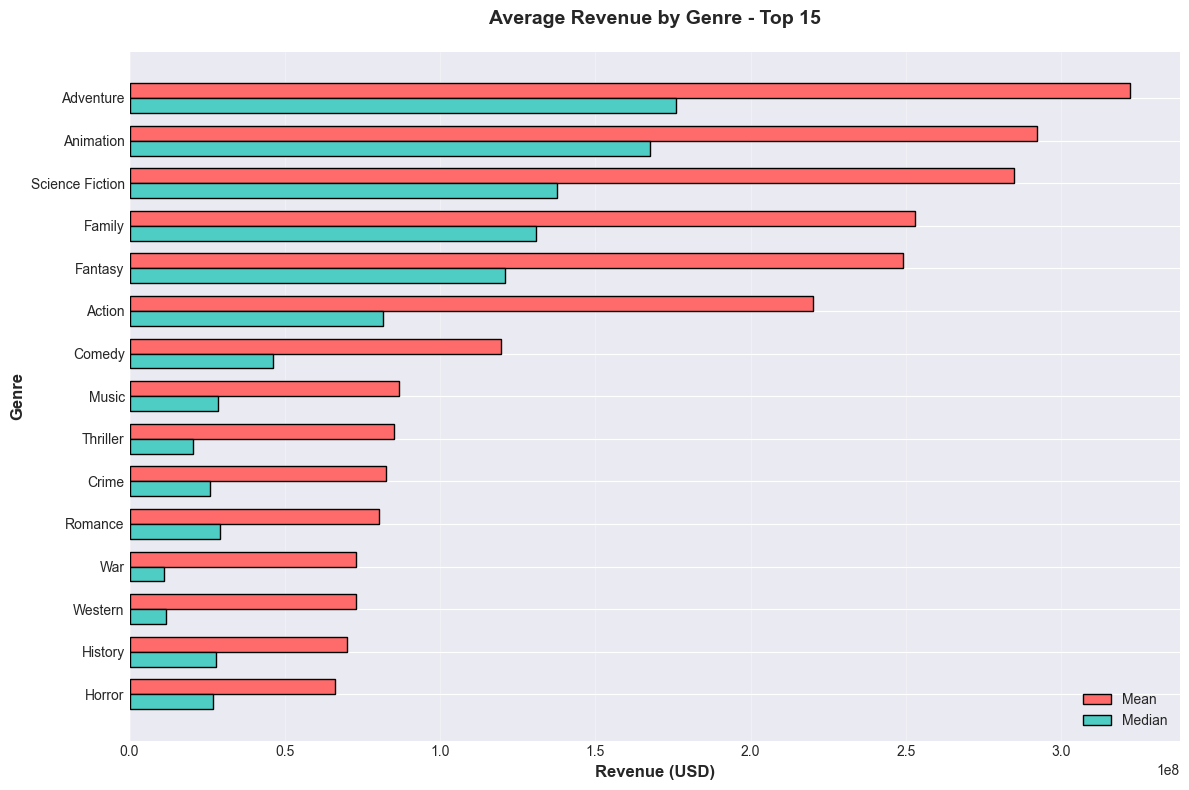

In [74]:
# Tính average revenue theo genres
if 'genres' in df.columns:
    genre_revenue = {}
    
    for genres_str in df['genres'].dropna():
        genres_list = genres_str.split('|')
        for genre in genres_list:
            if genre not in genre_revenue:
                genre_revenue[genre] = []
    
    # Collect revenue for each genre
    for idx, row in df.iterrows():
        if pd.notna(row['genres']):
            genres_list = row['genres'].split('|')
            for genre in genres_list:
                if genre in genre_revenue:
                    genre_revenue[genre].append(row['revenue'])
    
    # Calculate statistics
    genre_stats = pd.DataFrame({
        'Genre': list(genre_revenue.keys()),
        'Mean_Revenue': [np.mean(revenues) for revenues in genre_revenue.values()],
        'Median_Revenue': [np.median(revenues) for revenues in genre_revenue.values()],
        'Count': [len(revenues) for revenues in genre_revenue.values()]
    })
    
    genre_stats = genre_stats.sort_values('Mean_Revenue', ascending=False).head(15)
    
    # Plot
    fig, ax = plt.subplots(figsize=(12, 8))
    
    x = np.arange(len(genre_stats))
    width = 0.35
    
    bars1 = ax.barh(x, genre_stats['Mean_Revenue'], width, 
                    label='Mean', color='#FF6B6B', edgecolor='black')
    bars2 = ax.barh(x + width, genre_stats['Median_Revenue'], width,
                    label='Median', color='#4ECDC4', edgecolor='black')
    
    ax.set_yticks(x + width / 2)
    ax.set_yticklabels(genre_stats['Genre'])
    ax.set_xlabel('Revenue (USD)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Genre', fontsize=12, fontweight='bold')
    ax.set_title('Average Revenue by Genre - Top 15', 
                 fontsize=14, fontweight='bold', pad=20)
    ax.invert_yaxis()
    ax.legend()
    ax.grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    save_and_show_plot('08_revenue_by_genre')

### Nhận xét về Revenue by Genres

**Về các thể loại có doanh thu cao (high-revenue genres):** Các thể loại như `Adventure`, `Animation`, `Science Fiction` và `Family` có mức doanh thu trung bình (mean) cao nhất, tiếp theo là `Fantasy` và `Action`. Những thể loại này thường liên quan đến các dự án phim quy mô lớn, nhằm phục vụ đối tượng khán giả rộng, đặc biệt là gia đình và thị trường quốc tế. Điều này giải thích tại sao các thể loại này lại có ngân sách sản xuất cao và tiềm năng doanh thu lớn.

**Về sự chênh lệch giữa mean và median:** Trong nhiều thể loại, đặc biệt là `Adventure`, `Animation`, `Science Fiction` và `Fantasy`, giá trị trung bình (mean) thường cao hơn nhiều so với giá trị trung vị (median). Điều này chỉ ra rằng trong mỗi thể loại này có một vài bộ phim thành công vượt trội (blockbusters), làm tăng trung bình doanh thu, trong khi phần lớn phim còn lại có doanh thu thấp hơn nhiều. Sự phân bổ này cho thấy rằng doanh thu theo thể loại cũng có xu hướng lệch phải, tương tự như phân phối tổng thể của doanh thu.

**Về các thể loại có doanh thu trung bình thấp hơn:** Các thể loại như `Horror`, `History`, `Western` hay `Music` có doanh thu trung bình và trung vị thấp hơn so với nhóm các thể loại đứng đầu bảng. Tuy nhiên, đây thường là những thể loại có ngân sách sản xuất thấp hơn, chẳng hạn như `Horror` và `Music`. Nếu xét theo tỷ suất lợi nhuận (ROI), những thể loại này có thể không kém các thể loại blockbuster về hiệu quả tài chính, vì chúng có thể tạo ra doanh thu cao hơn so với chi phí đầu tư. Điều này cho thấy khi phân tích hiệu quả tài chính, ngoài doanh thu tuyệt đối, còn cần xem xét yếu tố ngân sách để đánh giá chính xác hơn mức độ thành công của mỗi thể loại.



## 4.3. Revenue by Release Timing

Đã lưu plot: visualizations\eda_plots\09_revenue_by_timing.png


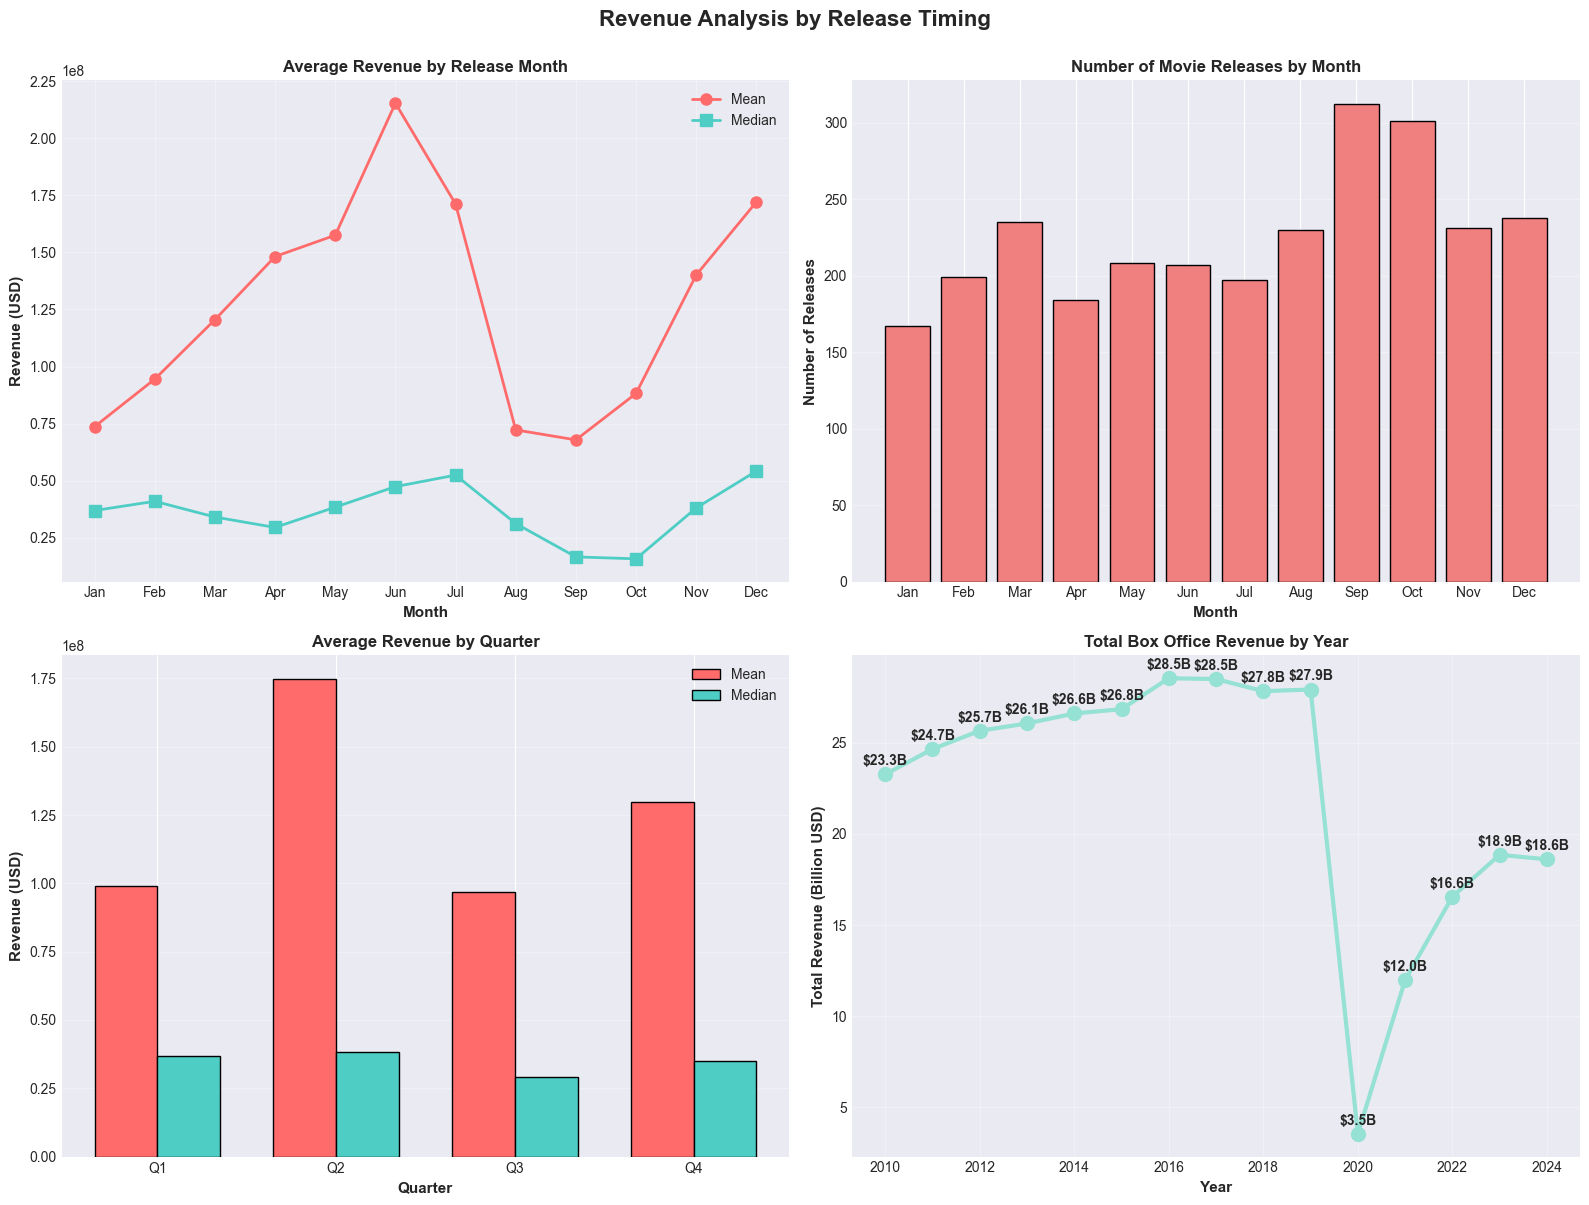

In [75]:
# Convert release_date to datetime and extract features
df['release_date_dt'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date_dt'].dt.year
df['release_month'] = df['release_date_dt'].dt.month
df['release_quarter'] = df['release_date_dt'].dt.quarter

# Revenue by month
month_revenue = df.groupby('release_month')['revenue'].agg(['mean', 'median', 'count']).reset_index()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Revenue by month - line plot
axes[0, 0].plot(month_revenue['release_month'], month_revenue['mean'], 
                marker='o', linewidth=2, markersize=8, color='#FF6B6B', label='Mean')
axes[0, 0].plot(month_revenue['release_month'], month_revenue['median'],
                marker='s', linewidth=2, markersize=8, color='#4ECDC4', label='Median')
axes[0, 0].set_xlabel('Month', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Revenue (USD)', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Average Revenue by Release Month', 
                     fontsize=12, fontweight='bold')
axes[0, 0].set_xticks(range(1, 13))
axes[0, 0].set_xticklabels(month_names)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Number of releases by month
axes[0, 1].bar(month_revenue['release_month'], month_revenue['count'],
               color='lightcoral', edgecolor='black')
axes[0, 1].set_xlabel('Month', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Number of Releases', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Number of Movie Releases by Month',
                     fontsize=12, fontweight='bold')
axes[0, 1].set_xticks(range(1, 13))
axes[0, 1].set_xticklabels(month_names)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Revenue by quarter
quarter_revenue = df.groupby('release_quarter')['revenue'].agg(['mean', 'median', 'count']).reset_index()
x_pos = np.arange(len(quarter_revenue))
width = 0.35

axes[1, 0].bar(x_pos - width/2, quarter_revenue['mean'], width,
               label='Mean', color='#FF6B6B', edgecolor='black')
axes[1, 0].bar(x_pos + width/2, quarter_revenue['median'], width,
               label='Median', color='#4ECDC4', edgecolor='black')
axes[1, 0].set_xlabel('Quarter', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Revenue (USD)', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Average Revenue by Quarter',
                     fontsize=12, fontweight='bold')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels([f'Q{int(q)}' for q in quarter_revenue['release_quarter']])
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Revenue by year
year_revenue = df.groupby('release_year')['revenue'].agg(['mean', 'median', 'sum', 'count']).reset_index()
axes[1, 1].plot(year_revenue['release_year'], year_revenue['sum']/1e9,
                marker='o', linewidth=3, markersize=10, color='#95E1D3')
axes[1, 1].set_xlabel('Year', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Total Revenue (Billion USD)', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Total Box Office Revenue by Year',
                     fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

# Add values on points
for x, y in zip(year_revenue['release_year'], year_revenue['sum']/1e9):
    axes[1, 1].text(x, y + 0.5, f'${y:.1f}B', ha='center', fontweight='bold')

plt.suptitle('Revenue Analysis by Release Timing', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
save_and_show_plot('09_revenue_by_timing')


### Nhận xét về Release Timing

**Về các mô hình theo mùa (seasonal patterns) theo tháng:**
Biểu đồ về doanh thu trung bình theo tháng cho thấy rõ rệt rằng doanh thu cao nhất thường rơi vào các tháng cuối năm, đặc biệt là **tháng 12**, với các tháng mùa hè như **tháng 6 và 7** cũng có doanh thu cao. Trong đó, tháng 6 là tháng có doanh thu trung bình cao nhất, tiếp theo là tháng 7 và tháng 12. Các tháng như **tháng 1, tháng 4, tháng 9, và tháng 10** có mức doanh thu trung bình thấp hơn. Điều này phản ánh chiến lược phát hành của các hãng phim, khi nhiều bom tấn thường được phát hành vào mùa hè và mùa lễ cuối năm, thời điểm khán giả có xu hướng đi xem phim nhiều hơn.

Một điểm đáng chú ý là **median revenue** luôn thấp hơn **mean revenue** ở hầu hết các tháng, đặc biệt là các tháng có doanh thu cao. Điều này chỉ ra rằng trong những tháng cao điểm, chỉ có một vài bộ phim thành công cực kỳ (blockbusters) kéo doanh thu trung bình lên, trong khi phần lớn phim có doanh thu ở mức thấp hơn.

**Về số lượng phim phát hành theo tháng:**
Biểu đồ số lượng phim phát hành cho thấy các tháng **tháng 9, tháng 10, tháng 11 và tháng 12** có số lượng phim ra mắt lớn nhất. Tuy nhiên, khi so sánh với biểu đồ doanh thu, chúng ta thấy:

- **Tháng 9 và tháng 10** có số lượng phim phát hành cao nhưng doanh thu trung bình lại không thuộc nhóm cao nhất.
- Ngược lại, **tháng 6** có số lượng phim không quá lớn nhưng lại có doanh thu trung bình rất cao.

Điều này chứng tỏ rằng **sự gia tăng số lượng phim phát hành không đồng nghĩa với việc doanh thu trung bình tăng lên**. Mức độ cạnh tranh giữa các phim và sự xuất hiện của các "siêu phẩm" mới là yếu tố quyết định doanh thu.

**Về doanh thu theo quý:**
Khi phân tích theo quý, **Q2 (tháng 4–6)** có doanh thu trung bình cao nhất, cả về mean và median. **Q4 (tháng 10–12)** và **Q3 (tháng 7–9)** có mức doanh thu trung bình khá tương đương nhau và thấp hơn Q2. **Q1 (tháng 1–3)** có doanh thu trung bình thấp nhất. Điều này tiếp tục khẳng định sự quan trọng của mùa hè (Q2) đối với các bom tấn điện ảnh.

**Về xu hướng doanh thu theo năm:**
Biểu đồ tổng doanh thu box office theo năm cho thấy một sự phục hồi mạnh mẽ sau năm **2020**. Tổng doanh thu giảm mạnh xuống **3.5B USD** vào năm 2020, do ảnh hưởng của đại dịch Covid-19, khi nhiều rạp chiếu phim đóng cửa và hàng loạt bộ phim bị hoãn phát hành. Tuy nhiên, từ **2021 trở đi**, doanh thu tăng mạnh, đạt **12B USD** vào năm 2021, và tiếp tục phục hồi trong các năm **2022 (16.6B USD)** và **2023 (18.9B USD)**. Dự báo doanh thu vẫn sẽ duy trì ở mức cao vào năm **2024** (18.6B USD), mặc dù có sự giảm nhẹ.

Tóm lại, phân tích theo thời gian cho thấy doanh thu của ngành điện ảnh chịu ảnh hưởng rõ rệt bởi **yếu tố mùa vụ** và **bối cảnh bên ngoài**, đặc biệt là tác động của đại dịch Covid-19. Những yếu tố như tháng, quý và năm phát hành là rất quan trọng để hiểu và dự đoán xu hướng doanh thu, và có thể được sử dụng trong các mô hình phân tích dựa trên dữ liệu thời gian.


## 4.4. Correlation Analysis

Đã lưu plot: visualizations\eda_plots\10_correlation_heatmap_full.png


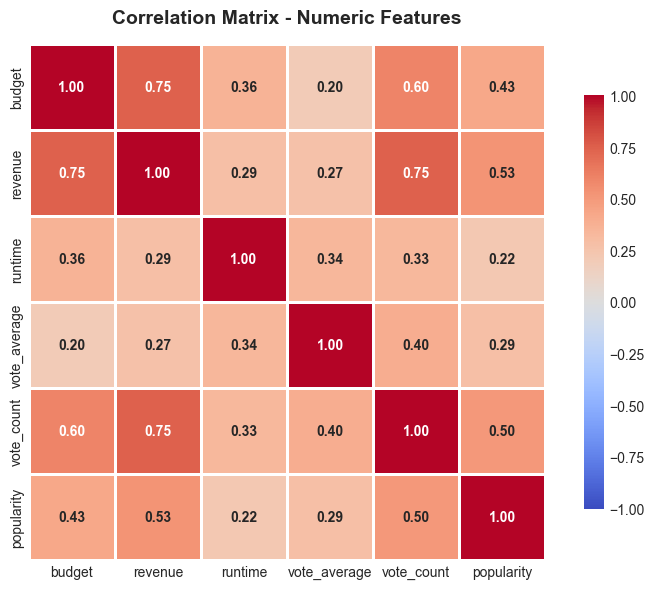

In [99]:
# Select numeric columns for correlation
corr_cols = ['budget', 'revenue', 'runtime', 'vote_average', 
             'vote_count', 'popularity']
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(8, 6))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    vmin=-1, vmax=1,   # scale cố định -1..1 cho màu tương phản hơn
    center=0,
    square=True,
    linewidths=0.8,
    cbar_kws={"shrink": 0.8},
    annot_kws={'fontweight': 'bold', 'fontsize': 10}
)

plt.title('Correlation Matrix - Numeric Features', fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
save_and_show_plot('10_correlation_heatmap_full')


In [100]:
# Top correlations with revenue
print_section_header("TOP CORRELATIONS WITH REVENUE")
revenue_corr = corr_matrix['revenue'].drop('revenue').sort_values(ascending=False)
print(revenue_corr.to_string())


--------------------------------------------------------------------------------
  TOP CORRELATIONS WITH REVENUE
--------------------------------------------------------------------------------

budget         0.75
vote_count     0.75
popularity     0.53
runtime        0.29
vote_average   0.27



### Nhận xét về Correlations

**Về các yếu tố quan trọng (strong predictors):**
Kết quả từ ma trận tương quan cho thấy các yếu tố có mối quan hệ mạnh mẽ nhất với doanh thu (revenue) là `budget` và `vote_count`, với hệ số tương quan lần lượt là **0.75**. Điều này cho thấy rằng ngân sách và số lượt đánh giá của phim có ảnh hưởng rất lớn đến doanh thu. Tiếp theo là `popularity` (0.53), chỉ ra rằng độ phổ biến của một bộ phim cũng có mối quan hệ đáng kể với doanh thu. Mặc dù `runtime` và `vote_average` có tương quan thấp hơn, nhưng chúng vẫn có sự liên kết nào đó với doanh thu.

**Về `runtime` và `vote_average`:**
Mặc dù có tương quan dương với `revenue`, nhưng `runtime` (0.29) và `vote_average` (0.27) có mức ảnh hưởng tương đối thấp. Điều này cho thấy thời lượng phim và điểm đánh giá không phải yếu tố chính quyết định doanh thu, mà các yếu tố như ngân sách, số lượng đánh giá và độ phổ biến quan trọng hơn nhiều.

**Về multicollinearity - đa cộng tuyến:**
Một điểm đáng lưu ý là giữa các biến giải thích có một số cặp có tương quan khá cao, chẳng hạn như `budget` với `vote_count` (0.60), và `vote_count` với `popularity` (0.50). Điều này cho thấy phim lớn thường có ngân sách cao, được quảng bá rộng rãi và thu hút nhiều lượt đánh giá. Mặc dù những tương quan này không phải quá cao (dưới 0.8), nhưng khi sử dụng các mô hình tuyến tính như **Linear Regression**, **Lasso** hay **Ridge**, bạn vẫn cần lưu ý hiện tượng multicollinearity và có thể kiểm tra thêm bằng các chỉ số như VIF (Variance Inflation Factor) để tránh vấn đề này.

**Tổng kết:**
Từ ma trận tương quan, ta có thể thấy rằng các yếu tố **`budget`**, **`vote_count`** và **`popularity`** đóng vai trò quan trọng nhất trong việc dự đoán doanh thu. Các yếu tố còn lại như **`runtime`** và **`vote_average`** có ảnh hưởng yếu hơn và nên được coi là các yếu tố phụ trợ trong mô hình dự đoán doanh thu.


---

# 5. TEXT ANALYSIS

Phần này phân tích text data từ cột overview (mô tả phim).

## 5.1. Overview Length Analysis

Đã lưu plot: visualizations\eda_plots\11_overview_length_analysis.png


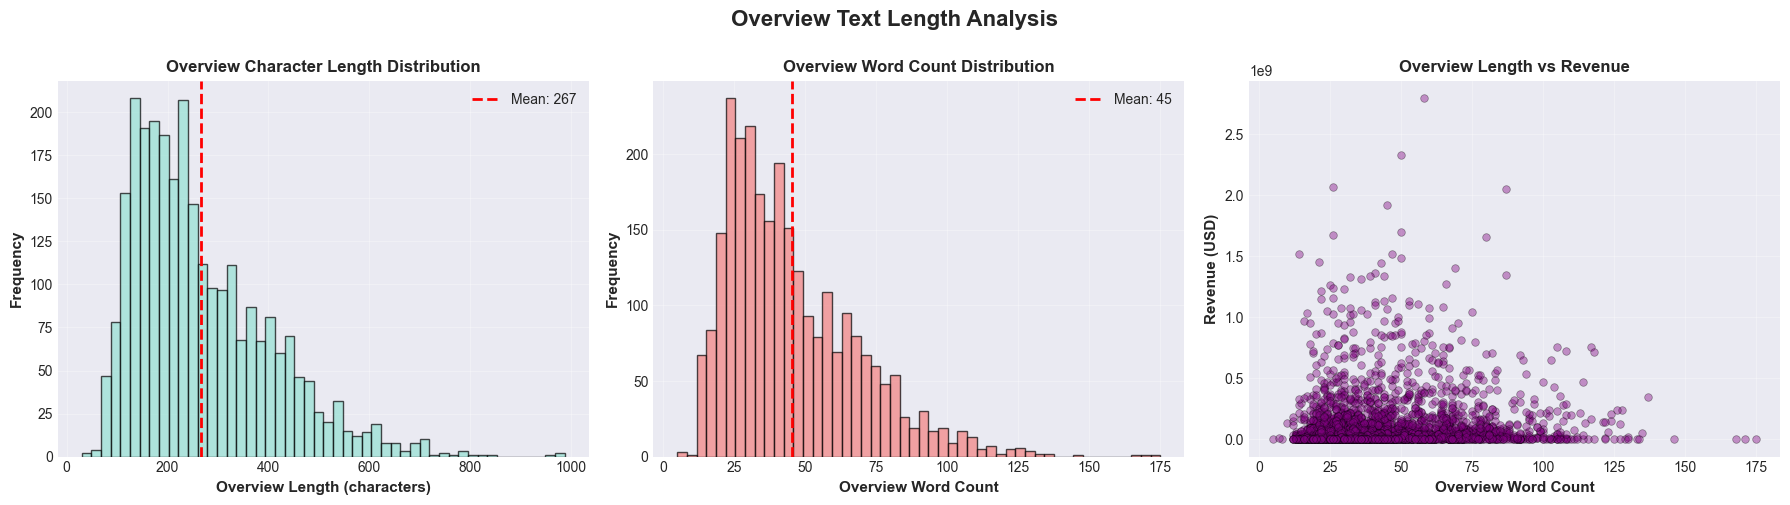

In [79]:
# Tính độ dài overview
df['overview_length'] = df['overview'].fillna('').apply(len)
df['overview_word_count'] = df['overview'].fillna('').apply(lambda x: len(x.split()))

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Character length distribution
axes[0].hist(df['overview_length'], bins=50, edgecolor='black', 
             alpha=0.7, color='#95E1D3')
axes[0].set_xlabel('Overview Length (characters)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0].set_title('Overview Character Length Distribution',
                  fontsize=12, fontweight='bold')
axes[0].axvline(df['overview_length'].mean(), color='red', 
                linestyle='--', linewidth=2, label=f'Mean: {df["overview_length"].mean():.0f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Word count distribution
axes[1].hist(df['overview_word_count'], bins=50, edgecolor='black',
             alpha=0.7, color='#F38181')
axes[1].set_xlabel('Overview Word Count', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[1].set_title('Overview Word Count Distribution',
                  fontsize=12, fontweight='bold')
axes[1].axvline(df['overview_word_count'].mean(), color='red',
                linestyle='--', linewidth=2, label=f'Mean: {df["overview_word_count"].mean():.0f}')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Scatter: Word count vs Revenue
axes[2].scatter(df['overview_word_count'], df['revenue'], 
                alpha=0.4, s=30, c='purple', edgecolors='black', linewidth=0.5)
axes[2].set_xlabel('Overview Word Count', fontsize=11, fontweight='bold')
axes[2].set_ylabel('Revenue (USD)', fontsize=11, fontweight='bold')
axes[2].set_title('Overview Length vs Revenue',
                  fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.suptitle('Overview Text Length Analysis', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
save_and_show_plot('11_overview_length_analysis')

In [80]:
# Statistics
print_section_header("OVERVIEW LENGTH STATISTICS")
print(f"Mean character length: {df['overview_length'].mean():.2f}")
print(f"Mean word count:       {df['overview_word_count'].mean():.2f}")
print(f"Min word count:        {df['overview_word_count'].min():.0f}")
print(f"Max word count:        {df['overview_word_count'].max():.0f}")


--------------------------------------------------------------------------------
  OVERVIEW LENGTH STATISTICS
--------------------------------------------------------------------------------

Mean character length: 267.08
Mean word count:       45.25
Min word count:        5
Max word count:        175



### Nhận xét về Overview Text Length

Kết quả thống kê cho thấy độ dài phần mô tả phim (`overview`) tương đối đồng nhất giữa các bộ phim:

* Độ dài trung bình khoảng **267 ký tự**,
* Tương ứng với trung bình khoảng **45 từ**,
* Độ dài ngắn nhất khoảng **5 từ** và dài nhất khoảng **175 từ**.

Hai biểu đồ histogram cho thấy phân phối cả về số ký tự và số từ đều tương đối tập trung quanh giá trị trung bình, hơi lệch phải một chút (một số ít overview rất dài). Phần lớn mô tả nằm trong khoảng khoảng **25–65 từ**, tương đương một đoạn giới thiệu ngắn gọn.

Biểu đồ scatter giữa `overview_word_count` và `revenue` cho thấy các phim có doanh thu rất cao chủ yếu tập trung trong vùng overview dài khoảng **30–70 từ**, trong khi những overview quá ngắn (≤ 20 từ) hoặc quá dài (≥ 90–100 từ) hầu như không xuất hiện các phim doanh thu “khủng”. Tuy vậy, ngay trong vùng 30–70 từ vẫn có rất nhiều phim doanh thu thấp, nên độ dài overview chỉ đóng vai trò như một “điều kiện cần mềm” (các hit lớn thường có phần mô tả vừa phải, không quá cực đoan), chứ không tạo ra một quan hệ tuyến tính rõ ràng với doanh thu. Vì vậy, chỉ riêng độ dài overview khó có thể trở thành một predictor mạnh; phần giá trị chính vẫn nằm ở **nội dung** của đoạn mô tả, cần được khai thác bằng các kỹ thuật NLP (TF-IDF, embeddings, v.v.).

Từ góc độ mô hình hóa, `overview_word_count` và `overview_length` có thể được giữ lại như những feature đơn giản để bổ sung thông tin, nhưng khó kỳ vọng chúng mang sức mạnh dự báo lớn nếu đứng một mình. Giá trị chính của cột `overview` nằm ở **nội dung văn bản**, vì vậy các bước tiếp theo nên tập trung vào các kỹ thuật NLP như TF-IDF, bag-of-words hoặc embeddings để trích xuất các đặc trưng giàu thông tin hơn (thể loại ngầm, tông giọng, mức độ kịch tính, v.v.) thay vì chỉ dựa vào độ dài.


## 5.2. Common Words Analysis

In [101]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

print_section_header("COMMON WORDS IN OVERVIEWS - USING COUNTVECTORIZER")

corpus = df['overview'].fillna('')

# Stopwords: english + custom, nhưng ÉP SANG LIST
custom_stop_words = {'they', 'them', 'himself', 'herself', 'themselves'}
stop_words = list(ENGLISH_STOP_WORDS.union(custom_stop_words))

vectorizer = CountVectorizer(
    stop_words=stop_words,           # giờ là list, OK
    lowercase=True,
    token_pattern=r'\b[a-zA-Z]{4,}\b',  # từ ≥ 4 ký tự
    min_df=3,
    max_df=0.8
)

X = vectorizer.fit_transform(corpus)

word_counts = np.asarray(X.sum(axis=0)).ravel()
vocab = np.array(vectorizer.get_feature_names_out())

word_freq = pd.DataFrame({
    'Word': vocab,
    'Count': word_counts
}).sort_values('Count', ascending=False)

top_words = word_freq.head(30)
display(top_words)



--------------------------------------------------------------------------------
  COMMON WORDS IN OVERVIEWS - USING COUNTVECTORIZER
--------------------------------------------------------------------------------



,Word,Count
2187,life,492
4236,world,431
4263,young,379
1365,family,374
3597,story,194
1795,home,190
1436,finds,189
4260,years,188
2250,love,188
1520,friends,181


Đã lưu plot: visualizations\eda_plots\12_common_words_overview_v2.png


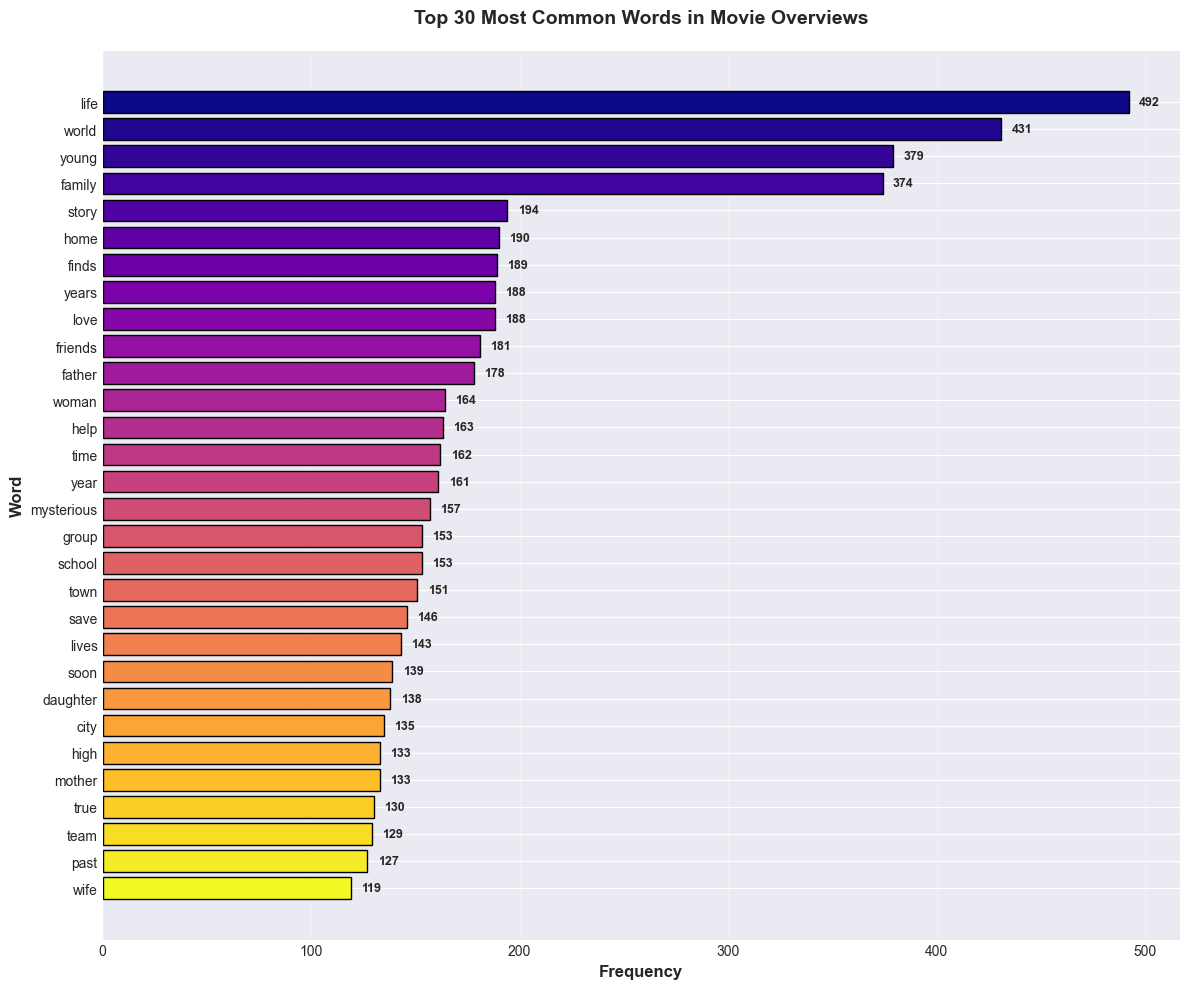

In [102]:
fig, ax = plt.subplots(figsize=(12, 10))

colors = plt.cm.plasma(np.linspace(0, 1, len(top_words)))
bars = ax.barh(top_words['Word'], top_words['Count'],
               color=colors, edgecolor='black')

for bar in bars:
    width = bar.get_width()
    ax.text(width + 5,
            bar.get_y() + bar.get_height()/2,
            f'{int(width)}',
            va='center', ha='left', fontweight='bold', fontsize=9)

ax.set_xlabel('Frequency', fontsize=12, fontweight='bold')
ax.set_ylabel('Word', fontsize=12, fontweight='bold')
ax.set_title('Top 30 Most Common Words in Movie Overviews',
             fontsize=14, fontweight='bold', pad=20)
ax.invert_yaxis()
ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
save_and_show_plot('12_common_words_overview_v2')



### Nhận xét về Text Analysis

**Các từ xuất hiện phổ biến:**
Danh sách top 30 từ cho thấy các từ như `life`, `world`, `young`, `family`, `story`, `home`, `finds`, `love`, `friends`, `father`… xuất hiện với tần suất cao. Điều này phản ánh khá rõ các chủ đề phổ biến trong điện ảnh:

* **Nhân vật và mối quan hệ** chiếm ưu thế, với các từ như `family`, `friends`, `father`, `mother`, `wife`, `daughter`, `team`.
* Các câu chuyện thường xoay quanh **hành trình và sự khám phá** như các từ `finds`, `save`, `journey`.
* Bối cảnh **thế giới và xã hội** cũng rất rõ ràng với các từ `world`, `life`, `town`, `city`, `past`.

Mặc dù đã loại bỏ phần lớn các từ dừng (stop words), danh sách từ vẫn chứa nhiều từ khá chung chung về mặt nội dung, như `life`, `world`, `story`, cho thấy rằng các mô tả phim chủ yếu sử dụng ngôn ngữ phổ thông và kể chuyện chung, mà không quá đặc trưng cho từng thể loại hoặc phân khúc.

**Về ý nghĩa cho TF-IDF và feature engineering:**
Việc nhiều từ xuất hiện với tần suất rất cao cho thấy **bag-of-words thô** có thể bị chi phối bởi các từ chung chung, làm giảm khả năng phân biệt giữa các bộ phim. Vì vậy, việc áp dụng **TF-IDF** (Term Frequency-Inverse Document Frequency) là một bước hợp lý, vì:

* **TF-IDF** sẽ giảm trọng số của những từ xuất hiện thường xuyên trong hầu hết các mô tả phim, như `life`, `world`, `family`, `story`.
* Đồng thời, nó sẽ tăng trọng số cho các từ ít xuất hiện hơn nhưng lại có giá trị phân biệt cao hơn trong mô tả phim (chẳng hạn các từ đặc trưng cho thể loại hoặc bối cảnh cụ thể).

Việc giới hạn số lượng từ (`max_features = 100`) là một lựa chọn an toàn cho mô hình cơ bản, giúp tránh làm phình to dữ liệu. Tuy nhiên, trong các bước cải tiến sau này, có thể cân nhắc tăng số lượng từ (ví dụ 500–2000 từ) để mô hình khai thác thông tin sâu hơn từ văn bản, đặc biệt khi sử dụng các mô hình có **regularization mạnh** như **Linear/Logistic Regression** với L2 hoặc các mô hình dựa trên cây (tree-based models).


---

# 6. MULTIVARIATE & SPECIAL ANALYSIS

Phần này thực hiện các phân tích đặc biệt choProduction Companies.

In [104]:
# Extract và analyze production companies
company_data = []

for idx, row in df.iterrows():
    if pd.notna(row['production_companies']):
        companies = row['production_companies'].split('|')
        for company in companies:
            company_data.append({
                'company': company.strip(),
                'revenue': row['revenue'],
                'budget': row['budget'],
                'profit': row['profit'],
                'roi': row['roi_percentage'] if 'roi_percentage' in row else 0
            })

company_df = pd.DataFrame(company_data)

# Aggregate statistics by company
company_stats = company_df.groupby('company').agg({
    'revenue': ['sum', 'mean', 'count'],
    'budget': 'sum',
    'profit': 'sum',
    'roi': 'mean'
}).reset_index()

company_stats.columns = ['company', 'total_revenue', 'avg_revenue', 
                         'num_movies', 'total_budget', 'total_profit', 'avg_roi']

# Filter companies with at least 3 movies
company_stats = company_stats[company_stats['num_movies'] >= 3]
company_stats = company_stats.sort_values('total_revenue', ascending=False)

In [105]:
# Top companies by different metrics
print_section_header("TOP 10 PRODUCTION COMPANIES BY TOTAL REVENUE")
top10_revenue = company_stats.nlargest(10, 'total_revenue')
for idx, row in top10_revenue.iterrows():
    print(f"{row['company'][:35]:35s} | "
          f"Movies: {int(row['num_movies']):3d} | "
          f"Total Revenue: {format_currency(row['total_revenue']):12s} | "
          f"Avg ROI: {row['avg_roi']:6.1f}%")


--------------------------------------------------------------------------------
  TOP 10 PRODUCTION COMPANIES BY TOTAL REVENUE
--------------------------------------------------------------------------------

Universal Pictures                  | Movies: 165 | Total Revenue: $36.58B      | Avg ROI:  328.5%
Warner Bros. Pictures               | Movies: 132 | Total Revenue: $34.11B      | Avg ROI:  216.8%
Columbia Pictures                   | Movies: 134 | Total Revenue: $32.64B      | Avg ROI:  242.4%
Marvel Studios                      | Movies:  32 | Total Revenue: $30.33B      | Avg ROI:  357.9%
Paramount Pictures                  | Movies: 112 | Total Revenue: $24.76B      | Avg ROI:  331.4%
20th Century Fox                    | Movies:  95 | Total Revenue: $23.03B      | Avg ROI:  242.4%
TSG Entertainment                   | Movies:  87 | Total Revenue: $18.81B      | Avg ROI:  239.7%
Walt Disney Pictures                | Movies:  49 | Total Revenue: $18.14B      | Avg ROI:  148.

Đã lưu plot: visualizations\eda_plots\14_production_companies_analysis.png


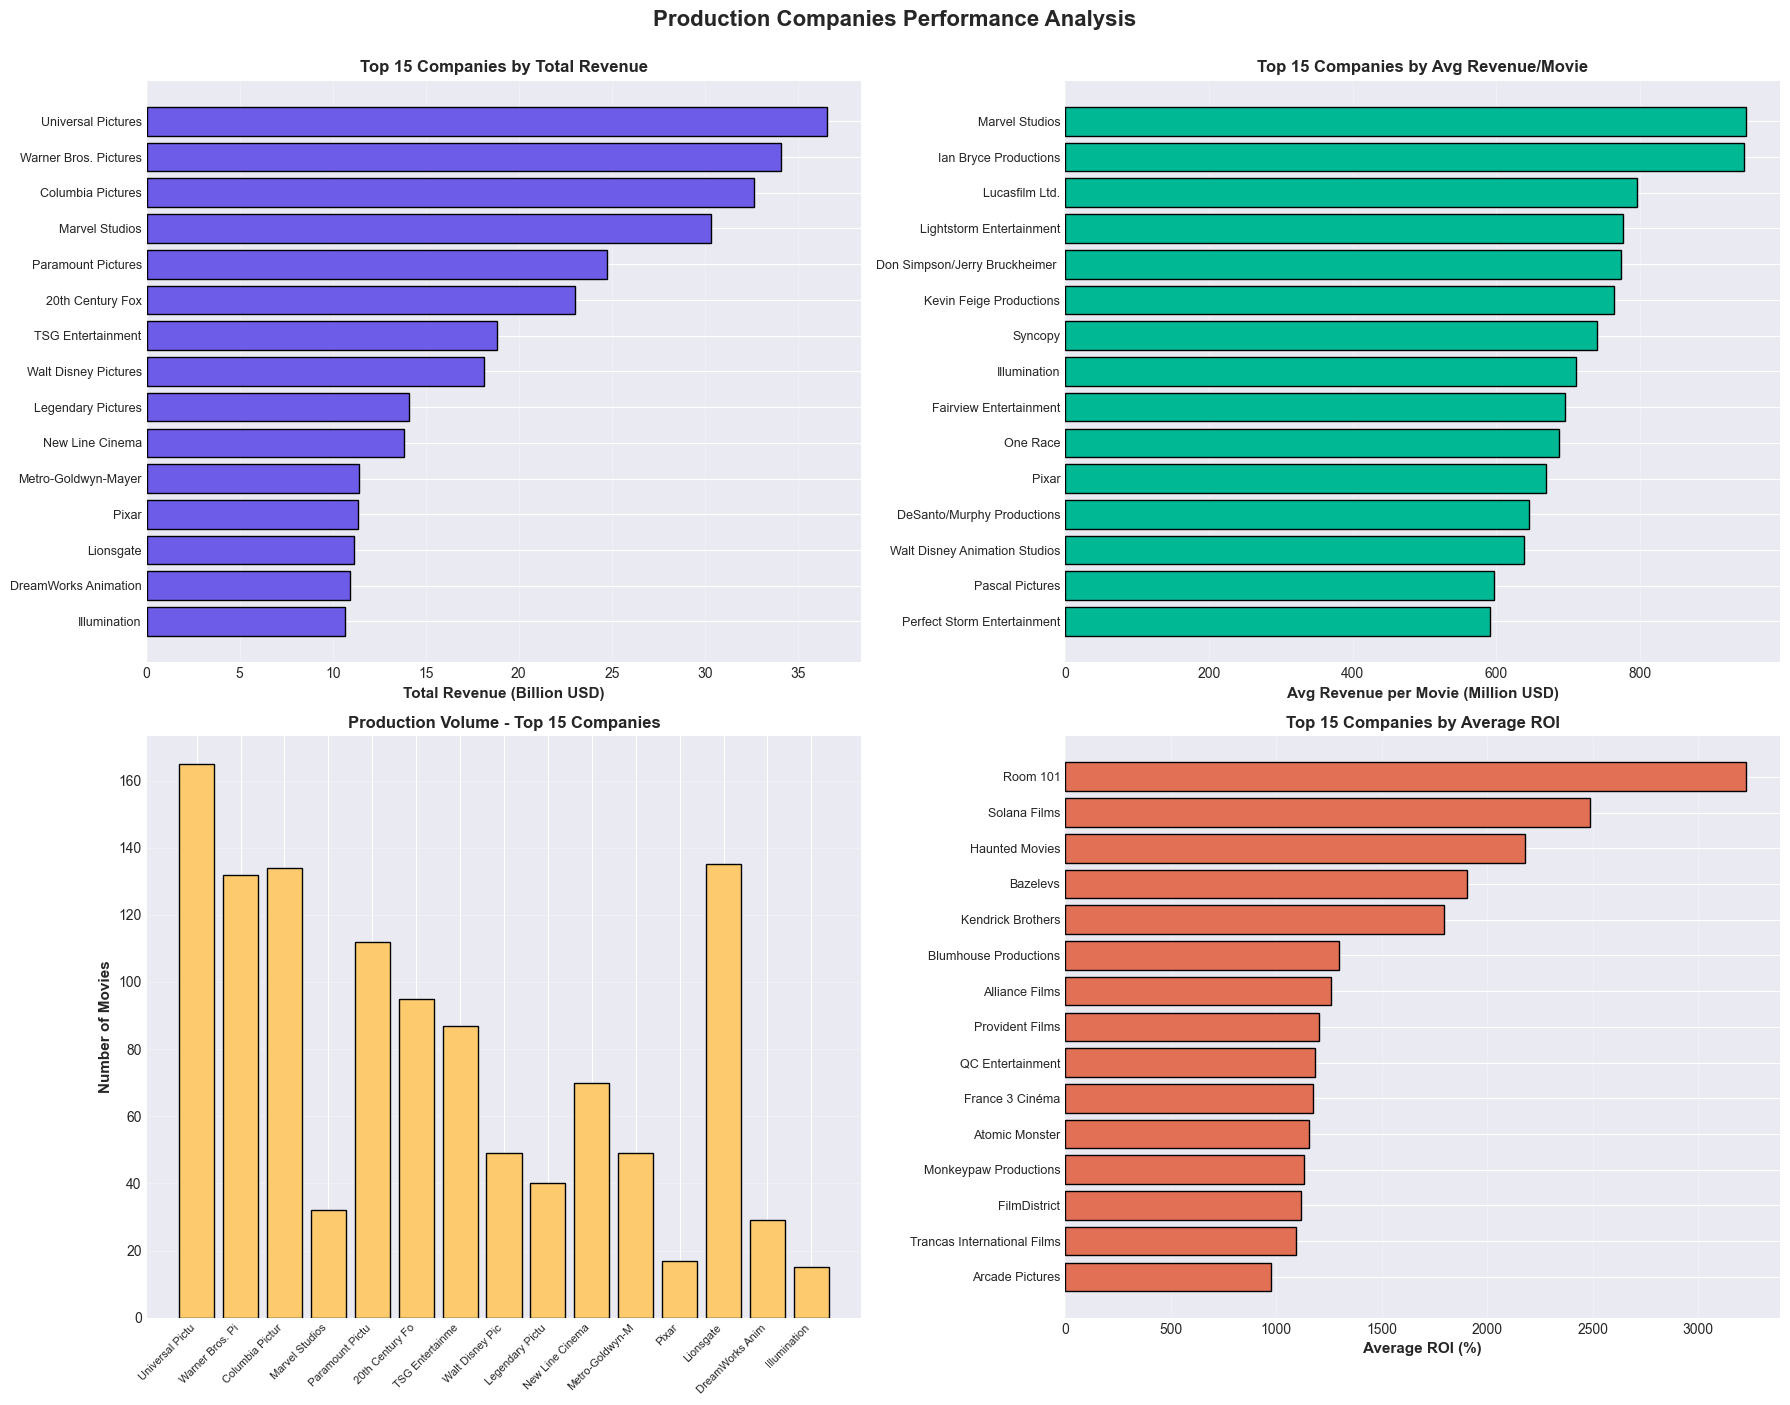

In [106]:
# Visualize production companies
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Top 15 by total revenue
top15_companies = company_stats.nlargest(15, 'total_revenue')
axes[0, 0].barh(range(len(top15_companies)), top15_companies['total_revenue']/1e9,
                color='#6C5CE7', edgecolor='black')
axes[0, 0].set_yticks(range(len(top15_companies)))
axes[0, 0].set_yticklabels([c[:30] for c in top15_companies['company']], fontsize=9)
axes[0, 0].set_xlabel('Total Revenue (Billion USD)', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Top 15 Companies by Total Revenue', fontsize=12, fontweight='bold')
axes[0, 0].invert_yaxis()
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Top 15 by average revenue per movie
top15_avg = company_stats.nlargest(15, 'avg_revenue')
axes[0, 1].barh(range(len(top15_avg)), top15_avg['avg_revenue']/1e6,
                color='#00B894', edgecolor='black')
axes[0, 1].set_yticks(range(len(top15_avg)))
axes[0, 1].set_yticklabels([c[:30] for c in top15_avg['company']], fontsize=9)
axes[0, 1].set_xlabel('Avg Revenue per Movie (Million USD)', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Top 15 Companies by Avg Revenue/Movie', fontsize=12, fontweight='bold')
axes[0, 1].invert_yaxis()
axes[0, 1].grid(True, alpha=0.3, axis='x')

# Number of movies by top companies
axes[1, 0].bar(range(len(top15_companies)), top15_companies['num_movies'],
               color='#FDCB6E', edgecolor='black')
axes[1, 0].set_xticks(range(len(top15_companies)))
axes[1, 0].set_xticklabels([c[:15] for c in top15_companies['company']], 
                            rotation=45, ha='right', fontsize=8)
axes[1, 0].set_ylabel('Number of Movies', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Production Volume - Top 15 Companies', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# ROI comparison
top15_roi = company_stats.nlargest(15, 'avg_roi')
axes[1, 1].barh(range(len(top15_roi)), top15_roi['avg_roi'],
                color='#E17055', edgecolor='black')
axes[1, 1].set_yticks(range(len(top15_roi)))
axes[1, 1].set_yticklabels([c[:30] for c in top15_roi['company']], fontsize=9)
axes[1, 1].set_xlabel('Average ROI (%)', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Top 15 Companies by Average ROI', fontsize=12, fontweight='bold')
axes[1, 1].invert_yaxis()
axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.suptitle('Production Companies Performance Analysis', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
save_and_show_plot('14_production_companies_analysis')


### Nhận xét về Production Companies

**1. Tổng doanh thu (Total Revenue)**

* **Universal Pictures** đứng đầu với tổng doanh thu lên đến **36.58 tỷ USD** từ 165 bộ phim, phản ánh vị thế của một công ty sản xuất lớn với hàng loạt bom tấn đình đám.
* Các công ty như **Warner Bros. Pictures**, **Columbia Pictures**, **Marvel Studios** và **Paramount Pictures** theo sau với tổng doanh thu trên 20 tỷ USD mỗi công ty. Đây đều là các công ty lớn, với một lượng phim lớn và chiến lược phát hành các dự án lớn, đặc biệt là các **franchise** và **sequel** (phim tiếp theo trong loạt phim).
* Các công ty này chủ yếu phát hành các phim **siêu anh hùng**, **hoạt hình**, và các **bom tấn** có ngân sách cao, điều này giúp họ duy trì doanh thu lớn trong ngành công nghiệp điện ảnh.

**2. Doanh thu trung bình mỗi phim (Avg Revenue/Movie)**

* **Marvel Studios** và các công ty như **Illumination**, **Pascal Pictures**, **Kevin Feige Productions** có **doanh thu trung bình mỗi phim** rất cao, dao động từ **600 triệu USD đến 800 triệu USD mỗi bộ phim**, mặc dù số lượng phim phát hành ít.
* Điều này cho thấy rằng các công ty này **đầu tư vào các dự án lớn và chất lượng**, mỗi bộ phim đều có tiềm năng lớn ở phòng vé, chẳng hạn như **phim siêu anh hùng** hoặc **hoạt hình** chiếu rạp cho gia đình. Các phim này mang lại doanh thu lớn nhưng số lượng phim không quá nhiều.
* Ngược lại, các công ty lớn khác có tổng doanh thu lớn nhưng doanh thu trung bình mỗi phim thấp hơn. Điều này phản ánh chiến lược phát hành **nhiều phim tầm trung** thay vì chỉ tập trung vào vài bom tấn.

**3. Sản lượng phim (Production Volume)**

* **Universal Pictures**, **Warner Bros. Pictures**, **Columbia Pictures**, **Paramount Pictures**, và **TSG Entertainment** dẫn đầu về **số lượng phim** với khoảng **120–165 bộ phim** trong giai đoạn 2020–2024. Đây là những công ty có **pipeline sản xuất nội dung dày**, với các thể loại phim đa dạng từ **phim gia đình**, **phim hành động**, đến các **bom tấn**.
* Ngược lại, những công ty như **Marvel Studios** và **Illumination**, mặc dù có **doanh thu trung bình cao mỗi phim**, lại có số lượng phim ít hơn, điều này cho thấy chiến lược của họ là **đầu tư vào từng dự án lớn và tập trung vào các thương hiệu mạnh** thay vì phát hành nhiều phim.

**4. Hiệu quả đầu tư (Average ROI)**

* **Marvel Studios** đứng đầu về **ROI trung bình**, với mức ROI khoảng **357.9%**, phản ánh sự thành công của họ không chỉ trong việc tạo ra doanh thu lớn mà còn là khả năng **hiệu quả về chi phí** khi đầu tư vào các phim siêu anh hùng có tiềm năng phòng vé cực kỳ cao.
* Một công ty nổi bật khác là **Illumination**, với **ROI trung bình rất cao** khoảng **766%**, mặc dù ngân sách phim của họ không quá lớn. Đây là một ví dụ điển hình cho chiến lược **hiệu quả chi phí** trong dòng phim hoạt hình gia đình. Họ có thể tạo ra doanh thu lớn từ các bộ phim như **Despicable Me**, nhưng vẫn duy trì chi phí sản xuất hợp lý, mang lại lợi nhuận cao.
* **New Line Cinema**, với **ROI cao (443.8%)**, cũng là một ví dụ về các công ty có chiến lược hiệu quả về đầu tư, đặc biệt là trong các thể loại **horror** hoặc **genre films**, nơi họ có thể đạt được doanh thu lớn từ ngân sách thấp.

**5. Tổng kết & Liên hệ với Dự đoán Doanh thu**

* Các **major studios** như **Universal**, **Warner Bros.**, **Columbia**, **Paramount**, và **Marvel** chiếm phần lớn doanh thu tuyệt đối, nhưng hiệu quả đầu tư (ROI) không phải lúc nào cũng vượt trội so với các công ty nhỏ hoặc các hãng chuyên dòng phim nhất định (ví dụ: **Illumination**, **New Line Cinema**).
* Các công ty như **Marvel Studios** và **Illumination** chứng minh rằng **chiến lược tối ưu chi phí** và tập trung vào **thương hiệu mạnh** có thể mang lại ROI rất cao. Trong khi đó, các công ty lớn hơn như **Universal** hay **Warner Bros.** dựa vào **sản lượng phim lớn** và một chiến lược **đa dạng hóa** thể loại phim.
* Trong mô hình dự đoán **doanh thu**, thông tin về **production companies** có thể là yếu tố quan trọng. Một số công ty nổi tiếng có thể mang lại tín hiệu mạnh về khả năng thu hút khán giả và doanh thu cao. Tuy nhiên, vì số lượng công ty rất lớn và phân bố theo mô hình **long-tail**, việc mã hóa **one-hot** cho tất cả các công ty sẽ làm nổ số chiều. Vì vậy, cần lựa chọn các công ty có hiệu suất cao và **được phân loại theo nhóm**, hoặc sử dụng các kỹ thuật như **target encoding** hoặc **mean revenue per company** để giảm thiểu số chiều và tránh overfitting trong mô hình.



In [107]:
# Kiểm tra trùng lặp
duplicates = df.duplicated().sum()
print(f"Tổng số lượng phim trùng lặp: {duplicates}")

Tổng số lượng phim trùng lặp: 0


---

# 7. KEY INSIGHTS & RECOMMENDATIONS

Phần này tổng hợp các insights quan trọng nhất và đưa ra recommendations cho preprocessing và modeling.

## 7.1. Key Findings Summary

### 1. Về biến mục tiêu (Doanh thu)

1. **Phân phối lệch phải mạnh:** Doanh thu có giá trị trung bình (mean) khoảng 111.6 triệu USD nhưng giá trị trung vị (median) chỉ vào khoảng 21.6 triệu USD. Phân phối này có độ lệch rất mạnh (skewness ~4.4), cho thấy phần lớn các bộ phim có doanh thu thấp hoặc trung bình, trong khi một số ít bộ phim "siêu thành công" kéo trung bình lên cao đáng kể.
2. **Log-transform cải thiện phân phối:** Sau khi áp dụng log-transform (log1p) cho biến doanh thu, phân phối trở nên cân bằng và gần chuẩn hơn. Điều này giúp mô hình dễ dàng xử lý và giảm sự ảnh hưởng của các giá trị cực đoan.
3. **Biên độ giá trị rất rộng:** Doanh thu dao động từ vài nghìn USD đến hơn 2.3 tỷ USD, điều này cho thấy sự chênh lệch lớn trong các bộ phim, cần có chiến lược chuẩn hóa phù hợp để mô hình không bị chi phối bởi những giá trị cực lớn.
4. **Outliers có ý nghĩa thực tế:** Các giá trị ngoài lệ (outliers) ở phía trên chính là các bộ phim bom tấn, không phải là lỗi dữ liệu. Những giá trị này chứa thông tin quan trọng, do đó không nên loại bỏ mà có thể áp dụng các phương pháp xử lý như log-transform hoặc chọn mô hình ít nhạy cảm với outliers (như mô hình tree-based).

### 2. Về các biến dự báo (Biến độc lập)

1. **`budget` là yếu tố quan trọng nhất:** `budget` có sự tương quan mạnh nhất với doanh thu (~0.66). Đây là biến phản ánh quy mô đầu tư của bộ phim, có vai trò quan trọng trong việc dự đoán doanh thu.
2. **Mức độ phổ biến và số lượng đánh giá (vote_count):** `popularity` và `vote_count` cũng có sự tương quan khá cao với doanh thu (~0.64). Điều này phản ánh mức độ quan tâm của khán giả và sự ảnh hưởng của truyền thông, marketing đến doanh thu.
3. **Chất lượng đánh giá không quyết định doanh thu:** `vote_average` chỉ có sự tương quan thấp (~0.27) với doanh thu. Điều này cho thấy điểm đánh giá của khán giả không phải là yếu tố quyết định doanh thu, mà yếu tố marketing, thương hiệu và thời điểm phát hành quan trọng hơn.
4. **Ảnh hưởng của thời điểm phát hành:** Phân tích theo tháng và quý cho thấy doanh thu trung bình cao hơn vào các mùa hè (tháng 6–7) và cuối năm (tháng 11–12). Tuy nhiên, giai đoạn 2020–2021 có ảnh hưởng từ COVID-19, nên cần thận trọng khi áp dụng kết quả này trong tương lai.

### 3. Về các thể loại phim (Genres)

1. **Các thể loại có doanh thu cao:** Các thể loại như Adventure, Science Fiction, Family, Animation và Action thường có doanh thu trung bình cao hơn so với mặt bằng chung. Những thể loại này thường hướng tới đối tượng gia đình hoặc mang tính giải trí cao, dễ dàng phát triển thành các bộ phim bom tấn.
2. **Các thể loại phổ biến nhất:** Drama, Comedy và Action là những thể loại xuất hiện nhiều nhất trong giai đoạn 2020–2024, phản ánh xu hướng sản xuất phim đa dạng nhưng vẫn xoay quanh những chủ đề quen thuộc.
3. **Đa thể loại là xu hướng phổ biến:** Phần lớn phim đều được gắn với nhiều thể loại (ví dụ: Action|Adventure|Sci-Fi). Điều này cho thấy sự phổ biến của các phim đa thể loại và yêu cầu xử lý đặc biệt (như MultiLabelBinarizer) trong bước tiền xử lý.
4. **Genres ảnh hưởng đến doanh thu:** Các thể loại phim có ảnh hưởng rõ rệt đến doanh thu, vì vậy việc mã hóa các thể loại trong bước feature engineering là rất quan trọng.

### 4. Về ROI (Return on Investment)

1. **Mối quan hệ nghịch đảo giữa ngân sách và ROI:** Các bộ phim có ngân sách thấp thường có ROI cao hơn, trong khi các bộ phim có ngân sách lớn lại có ROI thấp hơn. Điều này phản ánh sự hiệu quả trong việc đầu tư vào các dự án phim có chi phí thấp.
2. **Phạm vi ngân sách trung bình (50M–100M USD):** Các bộ phim có ngân sách trong khoảng này có ROI ổn định và tương đối cao, đây là mức đầu tư cân bằng giữa chất lượng sản xuất và rủi ro tài chính.
3. **Ngành công nghiệp phim có tính hit-driven:** Phần lớn lợi nhuận đến từ một tỷ lệ nhỏ phim (top 10–20% theo ROI). Điều này cho thấy mô hình dự đoán những "hit" lớn là yếu tố quan trọng hơn trong việc cải thiện hiệu quả của mô hình.
4. **Rủi ro cao từ phim có ngân sách lớn (>200M USD):** Các bộ phim có ngân sách lớn thường đi kèm với rủi ro lớn hơn, vì chúng có thể không đạt được ROI cao như kỳ vọng.

### 5. Về các công ty sản xuất (Production Companies)

1. **Các studio lớn chiếm ưu thế về doanh thu:** Các công ty sản xuất lớn như Universal Pictures, Marvel Studios, Warner Bros. Pictures chiếm phần lớn doanh thu, nhờ vào sản lượng lớn và các thương hiệu mạnh.
2. **Hiệu quả cao từ các hãng nhỏ:** Các công ty nhỏ như Illumination và Pascal Pictures có doanh thu và ROI trung bình rất ấn tượng, mặc dù số lượng phim ít hơn.
3. **Chiến lược sản xuất khác nhau:** Các hãng lớn thường phát hành nhiều phim với quy mô đa dạng, từ phim tầm trung đến bom tấn. Ngược lại, một số hãng nhỏ chọn chiến lược “ít nhưng chất”, tập trung vào những dự án lớn, có thương hiệu mạnh và doanh thu cao.
4. **Ý nghĩa đối với mô hình:** Biến `production_companies` mang lại nhiều thông tin giá trị, nhưng có sự phân phối dài (long-tail). Vì vậy, cần cân nhắc mã hóa hợp lý, như chỉ giữ các studio lớn hoặc sử dụng phương pháp target encoding.

### 6. Về dữ liệu văn bản (Overview)

1. **Độ dài thông tin tương đối ổn định:** Độ dài của `overview` trong khoảng 30–40 từ, đủ để truyền tải nội dung cốt lõi của phim. Đây là thông tin cơ bản nhưng khá ổn định.
2. **Các chủ đề phổ biến:** Các từ như `family`, `life`, `world` xuất hiện nhiều trong nội dung của các phim, phản ánh các motif quen thuộc như gia đình, hành trình trưởng thành và cứu thế giới.
3. **TF-IDF là phương pháp phù hợp:** Vì từ vựng khá lớn và tồn tại nhiều từ phổ biến, sử dụng TF-IDF là lựa chọn hợp lý để giảm trọng số các từ xuất hiện quá nhiều và làm nổi bật những từ đặc trưng cho từng bộ phim.
4. **Số lượng đặc trưng:** Đặt `max_features = 100` cho TF-IDF là lựa chọn hợp lý cho mô hình cơ bản, nhưng có thể tăng thêm nếu muốn khai thác thêm thông tin từ dữ liệu văn bản.




## 7.2. Recommendations for Preprocessing

### 1. Xử lý giá trị thiếu (Missing Values)

* **Các biến số (numeric columns: budget, revenue, runtime, votes, popularity, ROI, …):**

  * Ưu tiên dùng **KNN Imputation** thay vì các phương pháp đơn giản như điền **mean/median/zero**. KNN Imputer giúp tìm ra các phim tương đồng để điền giá trị thiếu, làm tăng tính chính xác trong việc ước lượng các giá trị missing.

* **Các biến phân loại (Categorical columns):**

  * Đối với các biến có ít giá trị và ổn định như `status`, `original_language`: có thể điền **mode** (giá trị phổ biến nhất) hoặc loại bỏ nếu không mang lại nhiều thông tin.
  * Đối với các biến có nhiều giá trị như `genres`, `production_companies`: nếu thiếu, có thể gán vào nhóm **"Unknown"** hoặc `"No Info"`, để mô hình có thể nhận diện đây là trạng thái thiếu dữ liệu riêng biệt.

* **Dữ liệu văn bản (Text columns, ví dụ: `overview`):**

  * Điền giá trị thiếu bằng **chuỗi rỗng** `""`, sau đó để **TF-IDF** hoặc **Embedding** xử lý. Việc này tránh phát sinh lỗi `NaN` trong vectorizer hoặc mô hình embedding.

---

### 2. Xử lý Outliers

* **Đối với revenue và profit/ROI:**

  * Các giá trị cực lớn chủ yếu là phim blockbuster, mang ý nghĩa kinh tế thực sự, do đó **không nên loại bỏ**.
  * Thay vì loại bỏ, có thể áp dụng **log-transformation** (`log1p`) đối với các biến như `revenue`, `budget`, hoặc `ROI` (nếu cần) để giảm ảnh hưởng của các outlier lên mô hình và giúp phân phối dữ liệu đồng đều hơn.
* **Đối với các biến số khác (vote_count, popularity, runtime, …):**

  * Dùng **IQR method** (phương pháp khoảng cách phần tư) hoặc **percentile capping** (cắt giá trị tại phần trăm 1st và 99th) cho các biến như `vote_count`, `popularity`, nếu phát hiện có các điểm dữ liệu sai lệch rõ ràng.
  * Việc loại bỏ hoàn toàn bản ghi chỉ nên thực hiện khi đã kiểm tra kỹ nguồn dữ liệu và xác định rõ ràng lỗi. Với mô hình mới (như RobustScaler), có thể giữ lại các outliers và xử lý qua scaling.

---

### 3. Kỹ thuật tạo đặc trưng (Feature Engineering)

* **Các đặc trưng thời gian từ `release_date`:**

  * Đã trích xuất các thông tin từ `release_date` bao gồm: `release_year`, `release_month`, `release_quarter`, `release_day_of_week`.
  * Thêm các biến flag như `is_summer_season` (tháng 5–7 mùa hè) và `is_holiday_season` (tháng 11–12 mùa lễ) giúp mô hình nhận diện các mùa vụ có ảnh hưởng lớn đến doanh thu.

* **Genres (multi-label):**

  * Tách chuỗi `genres` bằng dấu `|` và sử dụng **MultiLabelBinarizer** hoặc tự xây dựng **multi-hot encoding** cho các genre phổ biến nhất (ví dụ: top 15–20 genres). Điều này giúp mã hóa các thể loại phim một cách rõ ràng.
  * Các genres ít phổ biến có thể gộp vào nhóm "Other genre" để tránh việc nổ số chiều (exploding features), đồng thời giữ cho mô hình đơn giản hơn.

* **Production companies:**

  * Tương tự như `genres`, nhưng phân phối của `production_companies` có đặc điểm long-tail (dài). Có thể chỉ giữ lại các **top studios** theo số lượng phim hoặc tổng doanh thu, các hãng còn lại gộp vào nhóm "Other company", hoặc sử dụng **target encoding** hoặc **count encoding** nếu cần.

* **Overview (text data):**

  * Nếu có thư viện **sentence-transformers**, sử dụng **BGE Embedding** (semantic embeddings) cho cột `overview`, thay thế cho TF-IDF truyền thống để tạo ra các đặc trưng ngữ nghĩa giúp mô hình hiểu rõ hơn về nội dung của phim.
  * Nếu không có **sentence-transformers**, vẫn có thể sử dụng **TF-IDF** với các tham số:

    * `max_features ≈ 100` cho baseline (có thể tăng khi tối ưu),
    * `ngram_range=(1,2)` để sử dụng unigrams và bigrams,
    * `min_df=2` hoặc 3 để loại bỏ từ quá hiếm trong dữ liệu.

* **Các biến dẫn xuất khác:**

  * `profit = revenue - budget` (lợi nhuận)
  * `roi_percentage` hoặc `revenue_to_budget_ratio = revenue / (budget + ε)` (tỷ lệ lợi nhuận/chi phí)
  * `budget_per_minute = budget / runtime` (chi phí mỗi phút runtime)
  * Các biến tỷ lệ như `popularity_per_vote = popularity / (vote_count + 1)` để chuẩn hóa theo quy mô.

---

### 4. Scaling

* **Mô hình tuyến tính / khoảng cách (Linear Regression, Ridge, KNN, SVR, v.v.):**

  * Sử dụng **RobustScaler** thay vì StandardScaler để giảm ảnh hưởng của các outliers đối với các mô hình tuyến tính. Việc này giúp cho các mô hình tuyến tính hoạt động tốt hơn, nhất là khi dữ liệu có nhiều giá trị cực đoan.

* **Mô hình tree-based (RandomForest, XGBoost, LightGBM):**

  * Scaling không bắt buộc đối với mô hình cây quyết định, nhưng việc giữ lại log-transformation cho các biến như `budget` và `revenue` vẫn có lợi, vì giúp phân phối các giá trị đồng đều hơn và mô hình cây dễ dàng phân tách hơn.

* **Nguyên tắc chung:**

  * **Fit scaler trên train set**, sau đó áp dụng transform cho validation/test để tránh tình trạng data leakage.

---

### 5. Phòng tránh Data Leakage

* **Thứ tự các bước:**

  1. Chia **train/test** (và/hoặc train/val/test).
  2. Chỉ sử dụng **train** để: fit imputer, scaler, TF-IDF, encoder, chọn feature, phát hiện outlier (nếu có).
  3. Áp dụng các transformer đã fit trên train set sang validation/test.

* **Không dùng thông tin từ test:**

  * Không được sử dụng mean/median của toàn bộ dataset để impute dữ liệu,
  * Không fit TF-IDF trên cả train và test,
  * Không sử dụng kết quả trên test để điều chỉnh hyperparameter (nên dùng validation hoặc cross-validation).

Tuân thủ các khuyến nghị này giúp pipeline tiền xử lý trở nên rõ ràng, hạn chế leakage và duy trì độ tin cậy trong kết quả đánh giá mô hình.



## 7.3. Recommendations for Modeling

### 1. Lựa chọn mô hình

* **Mô hình cây quyết định (Tree-based models: RandomForest, XGBoost, LightGBM):**
  Các phân tích EDA cho thấy mối quan hệ giữa các biến như `budget`, `popularity`, `vote_count`, và thời điểm phát hành với `revenue` là phi tuyến và có nhiều tương tác phức tạp. Vì vậy, các mô hình cây, đặc biệt là các mô hình ensemble (RandomForest, Gradient Boosting, XGBoost, LightGBM), là lựa chọn lý tưởng cho bài toán này. Các mô hình này có thể xử lý các quan hệ phức tạp giữa các biến mà không cần phải xác định rõ trước về tính chất phi tuyến.

* **Baseline mô hình tuyến tính (Linear models):**
  Để có một baseline rõ ràng, nên bắt đầu với một mô hình đơn giản như **LinearRegression** hoặc **Ridge** (dựa trên biến mục tiêu đã log-transform). Sau đó, có thể so sánh kết quả từ mô hình tuyến tính với các mô hình phức tạp hơn để kiểm tra xem mô hình phi tuyến có thực sự cải thiện hiệu quả dự đoán hay không.

* **Ensemble / Stacking:**
  Sau khi đã xây dựng ba mô hình chính (RandomForest, XGBoost, LightGBM), có thể cân nhắc **stacking** hoặc **simple averaging** giữa các mô hình tốt nhất để giảm phương sai và cải thiện độ ổn định của dự đoán. Việc kết hợp nhiều mô hình giúp mô hình trở nên mạnh mẽ hơn và giảm thiểu sai số do lỗi của từng mô hình đơn lẻ.

* **Cross-validation:**
  Sử dụng **K-fold Cross-Validation (khoảng 5-fold)** trên tập huấn luyện để đánh giá hiệu quả mô hình thay vì chỉ dựa vào một phân chia validation cố định. Điều này đặc biệt quan trọng khi dataset không quá lớn (623 bộ phim), giúp đảm bảo mô hình không bị overfitting và có thể tổng quát tốt trên dữ liệu chưa thấy.

---

### 2. Tối ưu siêu tham số (Hyperparameter Optimization)

* **Sử dụng Optuna:**
  Optuna với **TPE sampler** là công cụ tối ưu siêu tham số rất hiệu quả cho việc tìm kiếm siêu tham số trong không gian lớn, vượt trội hơn so với phương pháp Grid Search hoặc Random Search truyền thống. Optuna có thể giúp tìm được bộ tham số tốt nhất mà không phải thử tất cả các kết hợp.

* **Nhóm tham số ưu tiên:**

  * **RandomForest:** `n_estimators`, `max_depth`, `max_features`, `min_samples_split`. Đây là những tham số chính ảnh hưởng mạnh đến việc chia nhánh của cây quyết định và hiệu suất của mô hình.
  * **XGBoost/LightGBM:** `n_estimators`, `learning_rate`, `max_depth`/`num_leaves`, `subsample`, `colsample_bytree`. Các tham số này có ảnh hưởng lớn đến khả năng tối ưu hóa và giảm độ thiên lệch/biến thiên của mô hình.

* **Số lượng thử nghiệm (trials):**
  Khoảng **50 trials cho mỗi mô hình** là mức cân bằng giữa chất lượng và thời gian. Nếu thời gian cho phép, có thể nâng số lượng lên 100+ trials cho mô hình tốt nhất, để tìm ra các tham số tối ưu nhất.

---

### 3. Metric đánh giá

* **Metric chính:**

  * Đề xuất sử dụng **RMSE** (Root Mean Squared Error) trên thang đo gốc của `revenue` (hoặc trên log-revenue nếu mô hình được huấn luyện trên log). RMSE sẽ nhấn mạnh những lỗi lớn, phù hợp với ngữ cảnh doanh thu vì các giá trị doanh thu có sự chênh lệch lớn giữa các bộ phim.

* **Metric bổ sung:**

  * **MAE** (Mean Absolute Error): Là sai số tuyệt đối trung bình, dễ hiểu và giúp xác định lỗi trung bình của dự đoán (USD).
  * **R²** (Coefficient of Determination): Cung cấp cái nhìn tổng quan về mức độ giải thích phương sai của mô hình.
  * Nếu mô hình huấn luyện trên `log(revenue)`, có thể báo cáo thêm **RMSLE** (Root Mean Squared Logarithmic Error) để đánh giá chất lượng dự đoán trên thang log.

* **Góc nhìn “business”:**

  * Thêm **MAPE** (Mean Absolute Percentage Error) vào các chỉ số đánh giá. MAPE giúp hiểu được sai lệch dưới dạng phần trăm, dễ dàng liên hệ hơn với bối cảnh tài chính (dự đoán lệch bao nhiêu % so với doanh thu thực tế).

---

### 4. Phân tích tầm quan trọng của đặc trưng

* **Feature importance từ mô hình cây:**

  * Với các mô hình cây (RandomForest/Gradient Boosting), sử dụng `feature_importances_` để xác định các đặc trưng quan trọng nhất. Thường thì các đặc trưng như `log_budget`, `log_popularity`, `vote_count`, các genre chính và thời điểm phát hành có ảnh hưởng lớn đến dự đoán doanh thu.

* **SHAP / Permutation importance:**

  * Nếu có thời gian và tài nguyên, sử dụng **SHAP values** hoặc **permutation importance** để hiểu sâu hơn về cách mô hình đưa ra quyết định. Ví dụ, nếu `budget` tăng thêm 10 triệu USD, dự đoán doanh thu sẽ thay đổi như thế nào. Đây là công cụ hữu ích để giải thích mô hình và tạo ra các báo cáo chi tiết.

* **Feature selection:**

  * Những đặc trưng có tầm quan trọng rất thấp và ít ý nghĩa về mặt trực giác có thể được loại bỏ trong quá trình thử nghiệm tiếp theo để đơn giản hóa mô hình, giảm nguy cơ overfitting và tăng tốc độ huấn luyện.

---

### 5. Các lỗi thường gặp cần tránh

* **Data leakage (Rò rỉ dữ liệu):**

  * Tuyệt đối không sử dụng thông tin từ tập test hoặc validation khi fit scaler, TF-IDF, encoder, hoặc khi chọn đặc trưng.
  * Phải chia **train/test** trước, sau đó thực hiện toàn bộ bước tiền xử lý/feature engineering chỉ trên tập huấn luyện (train).

* **Overfitting (Quá khớp mô hình):**

  * Luôn so sánh **train vs validation RMSE/R²**. Nếu mô hình huấn luyện trên tập train có hiệu suất quá tốt trong khi validation kém nhiều, cần giảm độ phức tạp của mô hình (giảm độ sâu của cây, tăng regularization, tăng số mẫu tối thiểu trên mỗi nhánh của cây, v.v.).

* **Ảnh hưởng của outliers:**

  * Kiểm tra xem các outliers, đặc biệt là những phim có doanh thu cực lớn, có làm méo các chỉ số đánh giá hay không (nhất là RMSE). Trong trường hợp này, có thể huấn luyện trên log-revenue hoặc sử dụng MAE/Median AE để đưa ra một cái nhìn cân bằng hơn.

* **Không ghi lại thí nghiệm:**

  * Nên lưu lại thông tin về mỗi lần chạy mô hình (bao gồm loại mô hình, tham số, seed, metric) vào file `results/experiments.csv` hoặc sử dụng công cụ logging đơn giản. Điều này giúp tái hiện kết quả và tránh tình trạng "mô hình tốt nhưng quên cấu hình".



## 7.4. Expected Model Performance


Các con số dưới đây chỉ mang tính chất kỳ vọng ban đầu, dựa trên phân tích EDA và các đặc điểm của bài toán (phân phối lệch phải mạnh, nhiều outliers, và nhiều yếu tố ngoài dữ liệu ảnh hưởng).

### 1. Mục tiêu thực tế cho thang đo gốc (revenue)

Khi mô hình dự đoán trực tiếp trên thang đo gốc của `revenue` (hoặc dự đoán log rồi exponentiate lại):

* **R²:** Khoảng từ **0.60 – 0.75**
  Nếu đạt gần 0.7 trở lên thì đã được coi là khá tốt trong bối cảnh dữ liệu có nhiều nhiễu và các yếu tố khó đo lường (như chi phí marketing, thương hiệu, độ phổ biến của phim...).

* **RMSE:** Khoảng **50–80 triệu USD**
  Doanh thu có biên độ dao động rất rộng từ vài nghìn USD đến hơn 2 tỷ USD, sai số tuyệt đối lên đến hàng chục triệu USD là điều không thể tránh khỏi trong các dự đoán.

* **MAE:** Khoảng **30–50 triệu USD**
  Đây có thể coi là sai số “điển hình” cho mỗi bộ phim, dễ dàng diễn giải hơn so với RMSE. MAE sẽ cho thấy sai số trung bình của dự đoán tính theo đơn vị USD.

* **MAPE:** Khoảng **40–60%**
  MAPE có thể cao do phân phối lệch mạnh, vì các phim có doanh thu thấp sẽ kéo MAPE lên cao đáng kể. MAPE dưới 40% là mục tiêu tham vọng, nhưng vẫn có thể đạt được nếu mô hình hoạt động tốt.

Những mức này giúp kiểm tra tính hợp lý của mô hình. Nếu mô hình cho ra các kết quả lệch quá xa (ví dụ: R² ~0.2 hoặc RMSE > 100 triệu USD), có thể nghi ngờ pipeline hoặc bước feature engineering cần được cải thiện.

---

### 2. Trường hợp mô hình train trực tiếp trên log(revenue)

Nếu mô hình train và đánh giá trên **log(revenue)**:

* **R²:** Có thể kỳ vọng **R²** sẽ cao hơn một chút (khoảng **0.70 – 0.85**) vì log-transformation đã làm phân phối trở nên ổn định hơn và giảm ảnh hưởng của các giá trị cực đoan.

* **RMSLE:** Được coi là metric phù hợp khi làm việc với thang đo log. Giá trị RMSLE nằm trong khoảng **0.4 – 0.6** có thể coi là hợp lý. Tuy nhiên, khi báo cáo kết quả, nên chuyển đổi lại sang các metric trên thang gốc để dễ dàng diễn giải về mặt kinh tế.

---

### 3. Lý do các mức kỳ vọng trên là hợp lý

1. **Revenue rất nhiễu:**
   Do nhiều yếu tố không có trong dataset (chi phí marketing, độ phủ truyền thông, rating ở các kênh khác, cạnh tranh tại thời điểm phát hành, franchise fanbase…). Vì vậy, doanh thu có sự biến động lớn và không thể giải thích hoàn toàn từ dữ liệu có sẵn.

2. **Range rộng và outliers mạnh:**
   Sự chênh lệch lớn giữa phim độc lập và phim bom tấn khiến sai số tuyệt đối tăng cao, đặc biệt là với RMSE. Các outliers làm tăng độ khó trong việc dự đoán chính xác cho những phim có doanh thu thấp hoặc rất cao.

3. **Phân phối lệch phải (skewed distribution):**
   Phân phối lệch phải làm cho các metric như MAPE hay RMSE trở nên nhạy cảm với vài điểm cực trị. Do đó, kết quả của những bộ phim nhỏ với doanh thu thấp có thể làm tăng MAPE một cách đáng kể.

4. **Budget là predictor mạnh nhưng không đủ:**
   Mặc dù `budget` có sự tương quan mạnh với `revenue` và giải thích được một phần lớn doanh thu, nhưng vẫn có nhiều phim "flop" hoặc "dark horse" (phim bất ngờ thành công), điều này làm giới hạn mức R² tối đa mà mô hình có thể đạt được.

---

### 4. Hướng cải thiện nếu kết quả chưa đạt kỳ vọng

Nếu mô hình ban đầu không đạt được mức kỳ vọng trên, có thể thử những phương án cải thiện sau:

1. **Feature engineering sâu hơn:**

   * Khám phá tương tác giữa `budget` và các biến như `genre`, `release_month`, `popularity`,
   * Tạo thêm các tỷ lệ như `revenue / budget`, `popularity / vote_count` để cung cấp thêm thông tin về mối quan hệ giữa các yếu tố này.
   * Nhóm lại các hãng sản xuất hoặc nhóm các thể loại phim thành các cụm (clusters) để đơn giản hóa đặc trưng.

2. **Bổ sung dữ liệu ngoài TMDb (nếu có điều kiện):**

   * Thêm thông tin về đạo diễn, dàn cast, franchise (ví dụ, phần mấy của series),
   * Ước tính chi phí marketing, số lượng rạp chiếu phim, dữ liệu truyền thông xã hội, v.v.

3. **Cải thiện mô hình:**

   * Dùng các phiên bản XGBoost/LightGBM đã được tinh chỉnh kỹ hơn với **Optuna** để tối ưu tham số.
   * Thử áp dụng **stacking** hoặc **blending** giữa nhiều mô hình mạnh mẽ khác nhau để cải thiện độ chính xác.

4. **Điều chỉnh theo mùa vụ và bối cảnh:**

   * Thêm các đặc trưng liên quan đến giai đoạn COVID (2020–2021),
   * Cờ cho các mùa đặc biệt như “holiday season”, “summer” hoặc các mốc thời gian quan trọng khác.

Tóm lại, mục tiêu chính của phần này là đưa ra một khung kỳ vọng hợp lý để đánh giá và so sánh mô hình sau khi huấn luyện, từ đó xác định xem mô hình đang ở mức “chấp nhận được”, “cần cải thiện thêm” hay “đang làm sai” trong quá trình triển khai.



---

## 🎉 EDA Completed!

Notebook này đã thực hiện comprehensive exploratory data analysis trên movie dataset. Tất cả visualizations đã được save vào `visualizations/eda_plots/` và sẵn sàng để đưa vào báo cáo.

### Next Steps:
1. ✅ Implement preprocessing pipeline dựa trên insights
2. ✅ Train models với optimized hyperparameters
3. ✅ Evaluate và compare model performance
4. ✅ Generate final visualizations cho báo cáo

### Files Generated:
- 14 high-quality PNG images trong `visualizations/eda_plots/`
- Comprehensive insights và recommendations
- Statistical summaries và correlations

**Notebook này có thể được sử dụng trực tiếp để:**
- Copy insights vào phần "Phân tích" của báo cáo
- Embed visualizations vào báo cáo Word/PDF
- Reference findings trong presentation
- Guide preprocessing decisions

---

*Notebook được tạo cho dự án Movie Revenue Prediction - Python cho Khoa học Dữ liệu K23*